<a href="https://colab.research.google.com/github/hchacon4/wdn_project/blob/main/Analysis/Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install utm
!pip install /content/drive/MyDrive/'Colab Notebooks'/'Water Distribution Network'/Simulators/network-simulator/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=7426ba4d249082f63288e69bcd56e503fc38d1cd523c5944629220cd600a910d
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb4157100bd02390436ed5d58ebfd3c6d6a0886
Successfully built utm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./drive/MyDrive/Colab Notebooks/Water Distribution Network/Simulators/network-simulator
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████

In [2]:
%matplotlib inline
    
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import torch

from network_simulator import WaterNetworkSimulator

from pathlib import Path

import networkx as nx
from networkx.algorithms import community
from networkx.algorithms import approximation

import wntr
import pickle

In [3]:
inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Simulators/network-simulator/networks/bwcn8-168-true.inp'

# # Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)

# # Get the network in a NetworkX format
graph = wn_sim.wn.get_graph()
print(graph)
print(graph.graph)
print(graph.nodes['J10'])   # unused variable (as far as I can tell)
print(graph.nodes.keys())
print(len(graph))   # reports the numbr of nodes/
print(graph['J10'])   # returns dict of key=adj_node and val=connect_edge
print(graph.edges['J10','J435', 'P295'])   # All three subscript args must be provided.
print(graph.edges.keys())   # Extract the pipes (third elem of tuple) and plot.
pipes = []
for _, __, pipe in graph.edges.keys() :
  pipes.append(pipe)
print(f'pipes: {pipes}')

# Adjacency list
# print(f'\nadj_ls: {nx.generate_adjlist(graph)}')
# for line in nx.generate_adjlist(graph) :
#   print(line)
# print()
print()
print(f'max_cut: {approximation.randomized_partitioning(graph.to_undirected())}')
print()

sg = graph.edge_subgraph([('J10','J435', 'P295')])
print(f'sg: {sg}')
# print(graph.subgraph(['J1','J10']))   # Returns a subgraph containing the listed nodes.
bi_g = community.kernighan_lin_bisection(graph.to_undirected())
print(bi_g)
# print(graph.subgraph(bi_g[0]))
# print(graph.subgraph(bi_g[1]))
sub_0 = graph.subgraph(bi_g[0])
sub_1 = graph.subgraph(bi_g[1])
bi_g0 = community.kernighan_lin_bisection(sub_0.to_undirected())
print(f'bi_g0: {bi_g0}')
sub_00 = graph.subgraph(bi_g0[0])
sub_01 = graph.subgraph(bi_g0[1])
# g2 = community.kernighan_lin_bisection(g1)
# print(community.kernighan_lin_bisection(graph.to_undirected()))
print(f'region0: {sub_0},\nregion1: {sub_1},\n region0.0: {sub_00},\n region0.1: {sub_01},\n')
bi_g1 = community.kernighan_lin_bisection(sub_1.to_undirected())
print(f'bi_g1: {bi_g1}')
sub_10 = graph.subgraph(bi_g1[0])
sub_11 = graph.subgraph(bi_g1[1])
print(f' region1.0: {sub_10},\n region1.1: {sub_11},\n')

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Simulators/network-simulator/networks/bwcn8-168-true.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


MultiDiGraph with 396 nodes and 444 edges
{}
{'pos': (-247926.36, 148178.68), 'type': 'Junction'}
KeysView(NodeView(('J511', 'J411', 'J414', 'J415', 'J416', 'J417', 'J418', 'J419', 'J310', 'J311', 'J312', 'J313', 'J314', 'J315', 'J316', 'J318', 'J319', 'J210', 'J211', 'J212', 'J214', 'J217', 'J218', 'J219', 'J110', 'J420', 'J421', 'J422', 'J1153', 'J1154', 'J1155', 'J425', 'J426', 'J1157', 'J427', 'J1158', 'J428', 'J429', 'J320', 'J321', 'J322', 'J324', 'J1056', 'J327', 'J1058', 'J328', 'J329', 'J220', 'J221', 'J225', 'J226', 'J50', 'J51', 'J53', 'J54', 'J128', 'J55', 'J129', 'J56', 'J57', 'J58', 'J59', 'J1160', 'J1161', 'J431', 'J432', 'J433', 'J434', 'J435', 'J436', 'J438', 'J1169', 'J439', 'J330', 'J331', 'J332', 'J333', 'J334', 'J335', 'J336', 'J337', 'J231', 'J232', 'J233', 'J234', 'J236', 'J237', 'J130', 'J131', 'J132', 'J133', 'J60', 'J134', 'J135', 'J62', 'J64', 'J65', 'J66', 'J67', 'J68', 'J69', 'J1170', 'J441', 'J444', 'J341', 'J344', 'J345', 'J347', 'J348', 'J349', 'J241', '

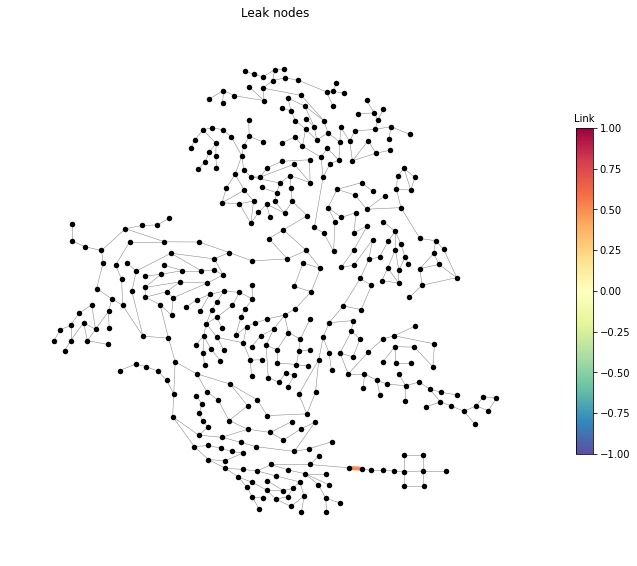

In [4]:
# Basic plots
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# wn_sim.plot(ax, 'P8', 'P800')
# pipe = 'P235'  # touching P10
pipe = 'P100'
# pipe = 'PU1'   won't show pumps
wn_sim.plot(ax, pipe, pipe)
ax.set_aspect('equal')
# 10 leak pipes SimData
# ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024']

In [5]:
# Distance between 2 pipes
print('Distance between pipes:', wn_sim.distance('P100', 'P1016'))

Distance between pipes: 33


/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


85


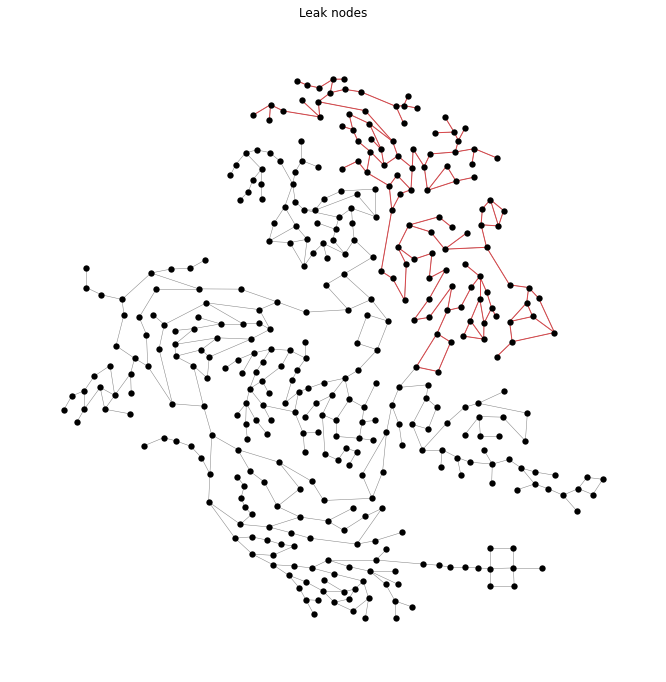

In [6]:
# Visualize regions
import wntr

inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'
# Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# fig, ax = plt.subplots(1, 1, figsize=(34, 34))
ax.set_aspect('equal')

link_attribute = {}
# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P1022', 'P1023', 'P1024']
# valid_pipes = ['P10', 'P100', 'P1000', 'P1016',]
# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024',   # 10 pipes
#                'P39', 'P11', 'P800', 'P810', 'P446', 'P320', 'P981', 'P967', 'P942', 'P958',   # 20 pipes
#                'P124', 'P397', 'P424', 'P292', 'P670', 'P51', 'P767', 'P120', 'P1042', 'P154',   # 30 pipes
#                'P14', 'P443', 'P823', 'P330', 'P268', 'P111', 'P141', 'P380', 'P163', 'P1045',   # 40 pipes
#                'P1033', 'P134', 'P220', 'P402', 'P924', 'P294', 'P787', 'P795', 'P142', 'P852',   # 50 pipes
#                ]   
# valid_pipes = ['P1']

pipes = [ ]  # contained all pipe names in WDN

# boundary notation: from-region_to-region (e.g. r1_r2 means from region1 to region2)
region0 = [# 2 boundary edges
           'P524', 'P237', 'P292', 'P291', 'P308', 'P293', 'P148', 'P268', 'P1036', 'P1026',
           'V47', 'V45', # valves
           'P386', 'P86', 'P165', # adjacent
           'P1042', 'P502', 'P977', # adjacent
           'P85', 'P238', 'P163', 'P938', 'P1035', 'P1034', 'P951', 'P252', 'P383', 'P501',
           'P267', 'P1039', 'P284', 'P1025', 'P344', 'P256', 'P933', 'P1024', 'P527', 'P1027',
           'P331', 'P54', 'P1028', 'P1029', 'P935', 'P937', 'P1032', 'P39', 'P384', 'P1033',
           'P1030', 'P1031', 'P340', 'P349', 'P347', 'P350', 'P914', 'P930', 'P929', 'P810',
           'P336', 'P343', 'P341', 'P337', 'P385', 'P338', 'P346', 'P330', 'P339', 'P329', 'P348',
           'P280', 'P305', 'P610', 'P510', 'P697', 'P670', 'P932', 'P671', 'P780', 'P754', 'P931',
           'P1016', 'P934', 'P940', 'P939', 'P942', 'P944', 'P941', 'P947', 'P946', 'P949', 'P948',
           'P959',  'P1023', 'P529', 'P1022', 'P597', 'P1040', 'P1041', 'P290', 'P304',
           'P955', 'P956', 'v1', 'P242', 'P243', 'P954', 'P142', 'P953', 'P957', 'P958', # adjacent
           'P943', 'P500', 'P270', 'P275', 'P285', 'P286', 'P288', 'P380', 'PU6', 'PU7',
           'P381',
           ]
region1 = ['P297', # Boundary edge (r1_r2) # 3 total
           'P18', # r1_r2
           'P379', # r1_r0
           'V2', # valves
           'P892', 'P96', 'P445', 'P446', 'P450', # adjacent
           'P215', 'P287', 'P99', 'P468', 'P467', 'P465', 'P294', 'P303', 'P123', 'P880',
           'P118', 'P120', 'P296', 'P307', 'P301', 'P117', 'P282', 'P299', 'P298', 'P484',
           'P804', 'P889', 'P801', 'P241', 'P800', 'P112', 'P91', 'P97', 'P83', 'P98',
           'P100', 'P22', 'P111', 'P115', 'P121', 'P23', 'P68', 'P924', 'P25', 'P17',
           'P30', 'P125', 'P26', 'P101', 'P104', 'P769', 'P72', 'P63', 'P64', 'P67',
           'P33', 'P107', 'P31', 'P122', 'P1', 'P109', 'P2', 'P24', 'P110', 'P34',
           'P6', 'P3', 'P757', 'P84', 'P758', 'P116', 'P32', 'P87', 'P119', 'P71',
           'P108', 'P106', 'P102', 'P27', 'P28', 'P29', 'P103', 'P134', 'P136', 'P174',
           'P962', 'P195', 'P201', 'P272', 'P482', 'P295', 'P302', 'P443', 'P756', 'P94', # adjacent (5 rows)
           'P755', 'P95', 'P763', 'P767', 'P768', 'P771', 'P772', 'P775', 'P777', 'P776',
           'P779', 'P783', 'P785', 'P786', 'P784', 'P787', 'P788', 'P791', 'P797', 'P794',
           'P795', 'P798', 'P796', 'P807', 'P805', 'P806', 'P113', 'P92', 'P374', 'P375',
           'P310', 'P320', 'P319', 'PU3', 'P322', 'P323', 'PU2', 'PU1',
           'P378', 'PU4', 'P376', 'PU5', 'P316',
           ]
region2 = [# 3 boundary edges # needs to be broken up into two regions
           'P19', # r2_r1
           'P996', # r2_r3
           'P53', # r2_r3
           'P218', 'P840', 'P219', 'P761', 'P220', 'P993', 'P127', 'P11', 'P223', 'P766',
           'P927', 'P9', 'P21', 'P991', 'P7', 'P8', 'P819', 'P989', 'P970', 'P990',
           'P789', 'P228', 'P813', 'P251', 'P815', 'P141', 'P759', 'P126', 'P132', 'P35',
           'P995', 'P817', 'P973', 'P811', 'P225', 'P809', 'P20', 'P230', 'P231', 
           'P233', 'P10', 'P234', 'P235', 'P13', # adjacent
           'P150', 'P55',  'P781', 'P808', # adjacent
           'P258', 'P90', 'P129', 'P259', 'P89', 'P124', 'P130', # adjacent
           'P147', 'P988', 'P961', 'P1000', 'P37', 'P987', 'P983', 'P984', 'P52', 'P724',
           'P725', 'P982', 'P166', 'P65', 'P821', 'P978', 'P249', 'P976', 'P974', 'P963',
           'P16', 'P184', 'P915', 'P966', 'P971', 'P255', 'P975', 'P972', 'P986', 'P5',
           'P69', 'P144', 'P211', 'P752', 'P753', 'P841', 'P760', 'P177', 'P965', 'P139',
           'P998', 'P968', 'P969', 'P994', 'P997', 'P992', 'P138', 'P999', 'P159', 'P964',
           'P131', 'P967', 'P12', 'P14', 'P15', 'P128', 'P70',
           # region 5
           'P161', 'P981', 'P822', 'P309',
           ]
region3 = [# 2 boudary edge
           'P397', # r3_r2
           'P424', # r3_r2
           'P140', 'P372', 'P42', 'P633', 'P38', 'P847', 'P596', 'P609', 'P846', 'P852',
           'P40', 'P844', 'P850', 'P158', 'P823', 'P826', 'P155', 'P851', 'P1045', 'P43',
           'P44', 'P853', 'P51', 'P866', 'P46', 'P157', 'P827', 'P154', 'P830', 'P160',
           'P831', 'P162', 'P246', 'P156', 'P248', 'P266', 'P57', 'P492', 'P58', 'P245',
           'P264', 'P859', 'P49', 'P48', 'P861', 'P398', 'PU8', 'P399', 'PU9', 'P403', 'P409', 'P402', # adjacent
           'P871', 'P855', 'P858', 'P842', 'PU10', 'PU11', 'P410',  'P1044'
           ]

# assign color values to pipes
# for pipe in valid_pipes:
#   link_attribute[pipe] = 0.75
# print(link_attribute)
for pipe in pipes:
  link_attribute[pipe] = 0.75

reg0, reg1, reg2, reg3 = {}, {}, {}, {}
for pipe in region0:
  # link_attribute[pipe] = 0.75
  reg0[pipe] = 0.75
for pipe in region1:
#   link_attribute[pipe] = 0.75
  reg1[pipe] = 0.75
for pipe in region2:
#   link_attribute[pipe] = 0.75
  reg2[pipe] = 0.75
for pipe in region3:
#   link_attribute[pipe] = 0.75
  reg3[pipe] = 0.75

# if leak_pipe == detected_pipe:
#     link_attribute = {
#         leak_pipe: 0.5
#     }
# else:
#     link_attribute = {
#         leak_pipe: 1,
#         detected_pipe: -1
#     }

node_attribute = {}
# random_partioning (max cut) (nodes)
part_juncs1 = ['J254', 'J17', 'J204', 'J299', 'J246', 'J238', 'J156', 'J154', 'J128', 'J496', 'J269', 'J421', 'J180', 'J427', 'J312', 'J76', 'J93', 'J132', 'J188', 'J255', 'J77', 'J6', 'J50', 'J167', 'J265', 'J373', 'J322', 'J355', 'J297', 'J195', 'J488', 'J290', 'J84', 'J123', 'J220', 'J92', 'J316', 'J129', 'J36', 'J157', 'J323', 'J133', 'J281', 'J57', 'J494', 'J335', 'J311', 'J310', 'J1169', 'J134', 'J296', 'J358', 'J9', 'J26', 'J242', 'J194', 'J21', 'J163', 'J192', 'J72', 'J1024', 'J266', 'J237', 'J249', 'J151', 'J3', 'J362', 'J332', 'J202', 'J1161', 'J182', 'J498', 'J145', 'J22', 'J419', 'J65', 'J170', 'J509', 'J425', 'J83', 'T2', 'J576', 'J363', 'J574', 'J426', 'J101', 'J336', 'J303', 'J4', 'J372', 'J236', 'J309', 'J490', 'J495', 'J278', 'J214', 'J415', 'J492', 'J247', 'J285', 'J218', 'J497', 'J227', 'J428', 'J135', 'J8', 'J385', 'J186', 'J418', 'J345', 'J81', 'J365', 'J436', 'J207', 'J384', 'J33', 'J149', 'J175', 'J219', 'J56', 'J1208', 'J197', 'J27', 'J59', 'J201', 'J406', 'J511', 'J232', 'J489', 'J502', 'J321', 'J486', 'J258', 'J88', 'J216', 'J89', 'J97', 'J379', 'J353', 'J260', 'J344', 'J354', 'J334', 'J382', 'J504', 'J190', 'J18', 'J239', 'J349', 'J399', 'J152', 'J226', 'J315', 'J160', 'J20', 'J431', 'J267', 'J96', 'J366', 'J13', 'J401', 'J292', 'J78', 'J394', 'J314', 'J493', 'J224', 'J94', 'J37', 'R1', 'J205', 'J976', 'J417', 'J109', 'J367', 'J329', 'J319', 'J166', 'J70', 'J161', 'J422', 'J2', 'J257', 'J85', 'J55', 'J1160', 'J131', 'J351', 'J432', 'J298']
part_juncs2 = {'J337', 'J439', 'J34', 'J91', 'J153', 'J15', 'J239', 'J276', 'J230', 'J299', 'J371', 'J167', 'J499', 'J1157', 'J1', 'J251', 'J511', 'J422', 'J501', 'J349', 'J87', 'J165', 'J394', 'J136', 'J69', 'J158', 'J319', 'J52', 'J335', 'J150', 'J284', 'J145', 'J503', 'J89', 'J370', 'J90', 'J235', 'J210', 'J234', 'J206', 'J180', 'J32', 'T6', 'J280', 'T4', 'J178', 'J207', 'J225', 'J436', 'J237', 'J296', 'T3', 'J350', 'J132', 'J254', 'J168', 'J332', 'J170', 'J269', 'J176', 'J214', 'J316', 'J39', 'J174', 'J54', 'J1025', 'J1153', 'J329', 'J198', 'J171', 'J205', 'J429', 'J154', 'J408', 'J273', 'J418', 'J487', 'J376', 'J118', 'J327', 'J195', 'J242', 'J142', 'J291', 'J222', 'J379', 'J152', 'J314', 'J574', 'J236', 'J88', 'J179', 'J266', 'J324', 'J144', 'J318', 'J256', 'J232', 'J491', 'J3', 'J155', 'J216', 'J359', 'J208', 'J374', 'J438', 'J226', 'J245', 'J253', 'J502', 'R1', 'J218', 'J287', 'J203', 'J13', 'J330', 'J151', 'J40', 'J23', 'J215', 'J28', 'J233', 'J358', 'J347', 'J1208', 'J97', 'J300', 'J1058', 'J285', 'J76', 'J74', 'J320', 'J416', 'J281', 'J93', 'J323', 'J420', 'J363', 'J141', 'J258', 'J51', 'J95', 'J426', 'J244', 'J1161', 'J164', 'J1223', 'J148', 'J61', 'J213', 'J283', 'J200', 'J159', 'J204', 'J8', 'J331', 'J260', 'J64', 'J312', 'J22', 'J130', 'J2', 'J580', 'J133', 'J84', 'J341', 'J252', 'J345', 'J199', 'J110', 'J182', 'J297', 'J83', 'J53', 'J411', 'J21', 'J27', 'J6', 'J36', 'J274', 'J1158', 'J30', 'J20', 'J129', 'J490', 'J169', 'J289', 'J301', 'J1056', 'J247', 'J496', 'J248', 'J224', 'J255', 'J128', 'J186', 'J73', 'J372', 'J504', 'J373', 'J221'}
true_count = [x in part_juncs2 for x in part_juncs1]
print(sum(true_count))
# part_juncs = ['J1', 'J10', 'J100', 'J1000', 'J101', 'J1016', 'J102', 'J20', 'J40', 'J1024',   # 10 JiJes
#                'J39', 'J11', 'J800', 'J810', 'J446', 'J320', 'J981', 'J967', 'J942', 'J958',   # 20 JiJes
#                'J124', 'J397', 'J424', 'J292', 'J670', 'J51', 'J767', 'J120', 'J1042', 'J154',   # 30 JiJes
#                'J14', 'J443', 'J823', 'J330', 'J268', 'J111', 'J141', 'J380', 'J163', 'J1045',   # 40 JiJes
#                'J1033', 'J134', 'J220', 'J402', 'J924', 'J294', 'J787', 'J795', 'J142', 'J852',   # 50 pipes
#                 ]
# part_juncs = ['J511', 'J411', 'J414', 'J415', 'J416', 'J417', 'J418', 'J419', 'J310', 'J311',   # 10 juncs
#                'J312', 'J313', 'J314', 'J315', 'J316', 'J318', 'J319', 'J210', 'J211', 'J212',   # 20 juncs
#                'J214', 'J217', 'J218', 'J219', 'J110', 'J420', 'J421', 'J422', 'J1153', 'J1154',   # 30 juncs
#                'J1155', 'J425', 'J426', 'J1157', 'J427', 'J1158', 'J428', 'J429', 'J320', 'J321',   # 40 juncs
#                'J322', 'J324', 'J1056', 'J327', 'J1058', 'J328', 'J329', 'J220', 'J221', 'J225',   # 50 juncs
#                'J226', 'J50', 'J51',  'J54', 'J128', 'J55', 'J129', 'J56', 'J57', 'J58',   # 60 juncs
#                'J59', 'J1160', 'J1161', 'J431',
#                ]
# part_juncs = {'J39', 'J217', 'J85', 'J213', 'J87', 'J74', 'J65', 'J296', 'J140', 'J245',
              # 'J118', 'J244', 'J301', 'J54', 'J216', 'J214', 'J317', 'J302', 'J246', 'J68',
              # 'J337', 'T5', 'J78', 'J92', 'J323', 'J60', 'J67', 'J220', 'J50', 'J249', 'J64',
              # 'J145', 'J35', 'J215', 'J268', 'J236', 'J56', 'J242', 'J26', 'J212', 'J243',
              # 'J53', 'J59', 'J299', 'J123', 'T3', 'J25', 'J27', 'J309', 'J314', 'J248',
              # 'J24', 'J88', 'J300', 'J55', 'J77', 'J292', 'J218', 'J203', 'J341',
              # 'J1170', 'J71', 'J73', 'J211', 'J237', 'J76', 'J247', 'J197', 'J306', 'J241',
              # 'J69', 'T1', 'J84', 'J66', 'J62', 'J51', 'J31', 'J304', 'J202', 'J347', 'J250',
              # 'J72', 'J61', 'J345', 'J57', 'J190', 'J82', 'J315', 'J256', 'J141', 'J219', 'J344',
              # 'J295', 'J307', 'J30', 'J58', 'J70', 'J208', 'J86'
              # }
# for junc in part_juncs :
#   node_attribute[junc] = 0.75

# plot using wntr
wntr.graphics.plot_network(
    wn_sim.wn, 
    ax=ax, 
    # link_attribute=link_attribute,
    link_attribute=reg0,
    # link_attribute=reg1,
    # link_attribute=reg2,
    # link_attribute=reg3,
    # node_attribute=node_attribute,
    node_size=40, 
    link_width=1,
    link_range=[-1, 1],
    node_range=[0, 1],
    title='Leak nodes',
    add_colorbar=False,
    # link_labels=True,   # comment out
    # node_labels=True,
    # directed=True,   # comment out
)

# plot interactive leaflet
# wntr.graphics.network.plot_leaflet_network(
#     wn_sim.wn,
#     node_attribute_name='node_head'
#     # link_attribute=link_attribute, 
#     # node_size=30, 
#     # link_width=4,
#     # link_range=[-1, 1],
#     # title='Leak nodes',
#     # add_colorbar=False
#     # link_labels=True,   # comment out
#     # directed=True,   # comment out
# )
ax.set_aspect('equal')

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


mask_params: torch.Size([840])
mask_params: <class 'torch.Tensor'>


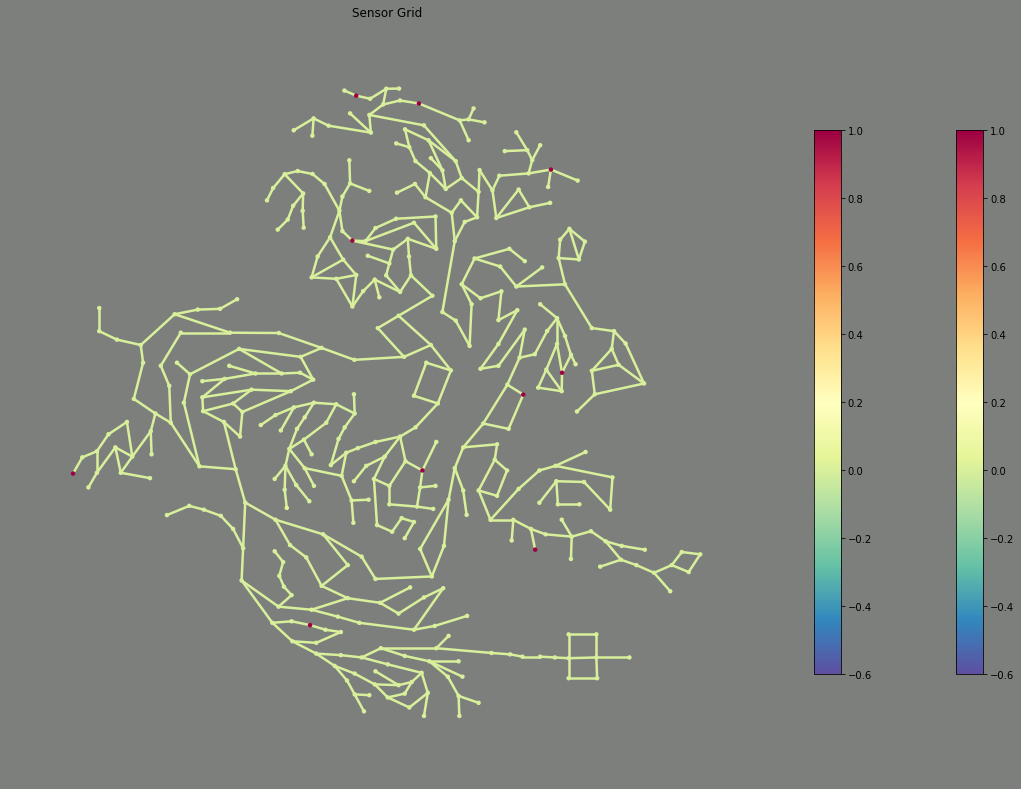

In [7]:
# Sensor Grid Layout
import wntr

regions = 20

inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'

mod_path = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Analysis/{regions}regions/'
# mod_file = mod_path + 'midTrainingModel.pt'
mod_file = mod_path + 'display_of_sensor_grid.pt'

# Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)
graph = wn_sim.wn.get_graph()
nodes = graph.nodes.keys()
# print(f'nodes {len(nodes)}')
edges = graph.edges.keys()
# print(f'edges {len(edges)}')
# print(f'edges {type(edges)}')
# print( edges['P10'] )   # Not subscriptable.
# print( isinstance(edges, object) )

# Extract params
# mod = torch.nn.Module()
loaded = torch.load(mod_file, map_location=torch.device('cpu'))
# mask_params = next(iter(loaded))
# print(mask_params)
mask_params = next(iter(loaded.values()))
# print(mask_params)
print('mask_params:', mask_params.size())
print('mask_params:', type(mask_params))
# prob_map = torch.sigmoid(mask_params)
sparse_probMap = torch.sigmoid(mask_params)
# print(sparse_probMap)
# print('prob_map:', prob_map.size())
# sparsity = 0.02
# mean = torch.mean(prob_map, dim=0, keepdim=True)
# print(f'mean {mean}')
# scalar = sparsity / mean
# beta_scalar = (1 - sparsity) / (1 - mean)
# toggle = torch.le(scalar, 1).float()
# sparse_probMap = ( toggle * scalar * prob_map
#                     + (1 - toggle) * (1 - (1 - prob_map) * beta_scalar) )
# print(sparse_probMap)
# assert False

# fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# fig, ax = plt.subplots(1, 1, figsize=(34, 34))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.set_aspect('equal')

# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P1022', 'P1023', 'P1024']   # original set
# valid_pipes = ['P10', 'P100', 'P1000', 'P1016',]
# valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024',]
valid_pipes = ['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P20', 'P40', 'P1024',   # 10 pipes
               'P39', 'P11', 'P800', 'P810', 'P446', 'P320', 'P981', 'P967', 'P942', 'P958',   # 20 pipes
              #  'P124', 'P397', 'P424', 'P292', 'P670', 'P51', 'P767', 'P120', 'P1042', 'P154',   # 30 pipes
              #  'P14', 'P443', 'P823', 'P330', 'P268', 'P111', 'P141', 'P380', 'P163', 'P1045',   # 40 pipes
              #  'P1033', 'P134', 'P220', 'P402', 'P924', 'P294', 'P787', 'P795', 'P142', 'P852',   # 50 pipes
               ]
# valid_pipes = ['P1']

link_attribute = {}
node_attribute = {}
i = 0
for edge in edges :   # Seems to always iter in the same order edges is ordered. (collection.abc.KeysView)
  # print(edge[2], end=' ')
  # link_attribute[edge[2]] = prob_map[i].item()
  link_attribute[edge[2]] = sparse_probMap[i].item()
  # print(i, edge)
  i += 1
for node in nodes :
  # node_attribute[node] = prob_map[i].item()
  node_attribute[node] = sparse_probMap[i].item()
  # print(i, node)
  i += 1
# print(node_attribute)

# node_attribute['J10'] = 0.75
# for i, node in enumerate(nodes) :
#     node_attribute[node] = prob_map[i].item()
# print(node_attribute)

# Highlight leak-pipe set
# for pipe in valid_pipes:
#   link_attribute[pipe] = -0.75

# print(link_attribute)
# if leak_pipe == detected_pipe:
#     link_attribute = {
#         leak_pipe: 0.5
#     }
# else:
#     link_attribute = {
#         leak_pipe: 1,
#         detected_pipe: -1
#     }

# plot using wntr
wntr.graphics.plot_network(
    wn_sim.wn, 
    ax=ax, 
    link_attribute=link_attribute,
    node_attribute=node_attribute,
    node_size=20, 
    link_width=2.5,
    link_range=[-0.6, 1],
    node_range=[-0.6, 1],
    title='Sensor Grid',
    add_colorbar=True,
    link_colorbar_label='',
    node_colorbar_label='',
    # link_labels=True,   # comment out
    # node_labels=True,
    # directed=True,   # comment out
    # filename=file_nm,   # save figure to filename path
)

# plot interactive leaflet
# wntr.graphics.network.plot_leaflet_network(
#     wn_sim.wn,
#     node_attribute_name='node_head'
#     # link_attribute=link_attribute, 
#     # node_size=30, 
#     # link_width=4,
#     # link_range=[-1, 1],
#     # title='Leak nodes',
#     # add_colorbar=False
#     # link_labels=True,   # comment out
#     # directed=True,   # comment out
# )
ax.set_aspect('equal')
# dir_path = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Analysis/download_these/'
dir_path = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Analysis/{regions}regions/download_{regions}regs/'
file_nm = dir_path + f'sensor_grid.png'
fig.savefig(file_nm, transparent=True)
fig.set_facecolor('#7d7f7c')
# assert False

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning: Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


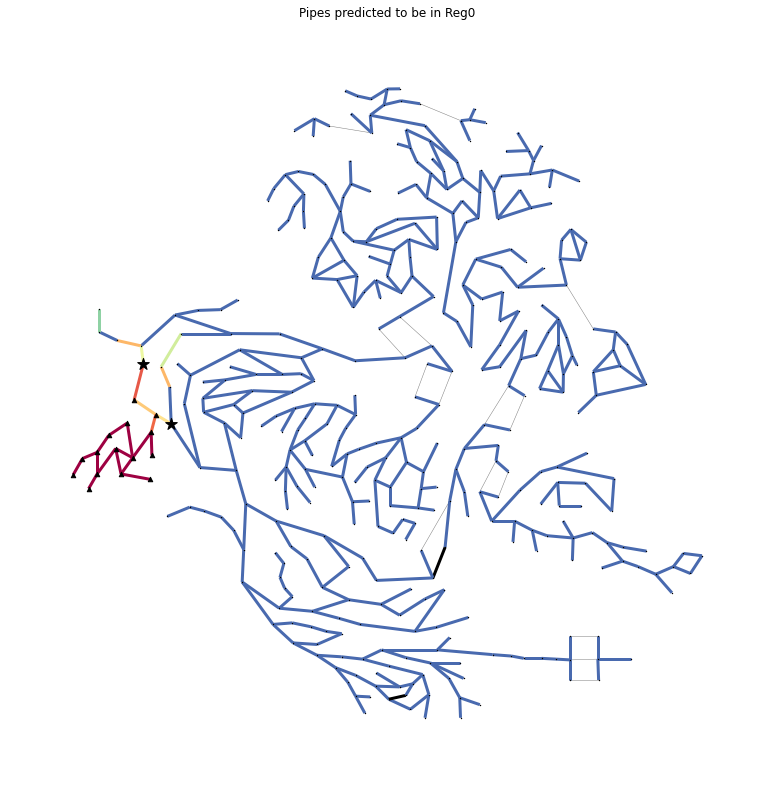

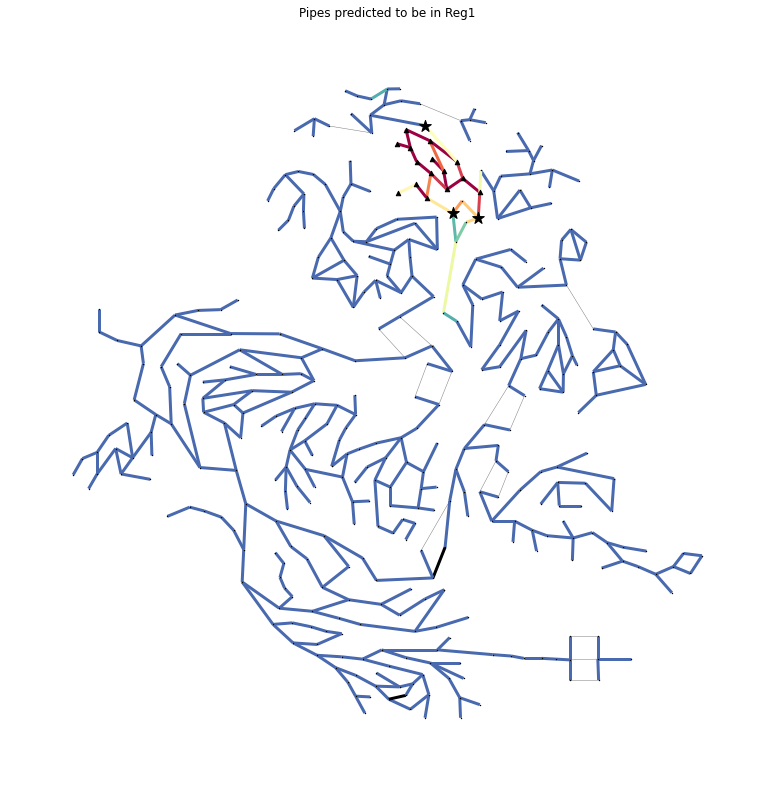

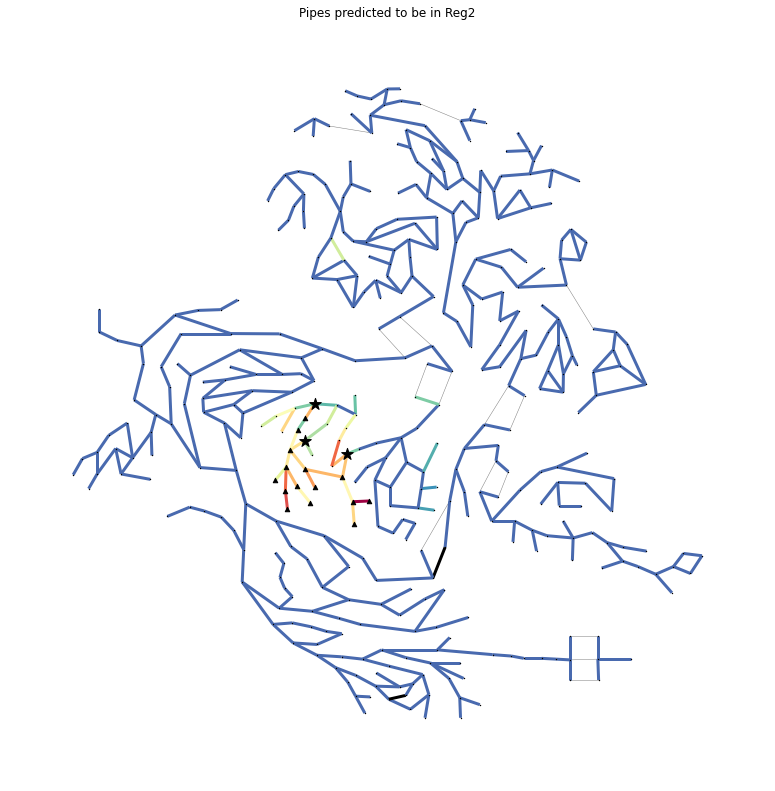

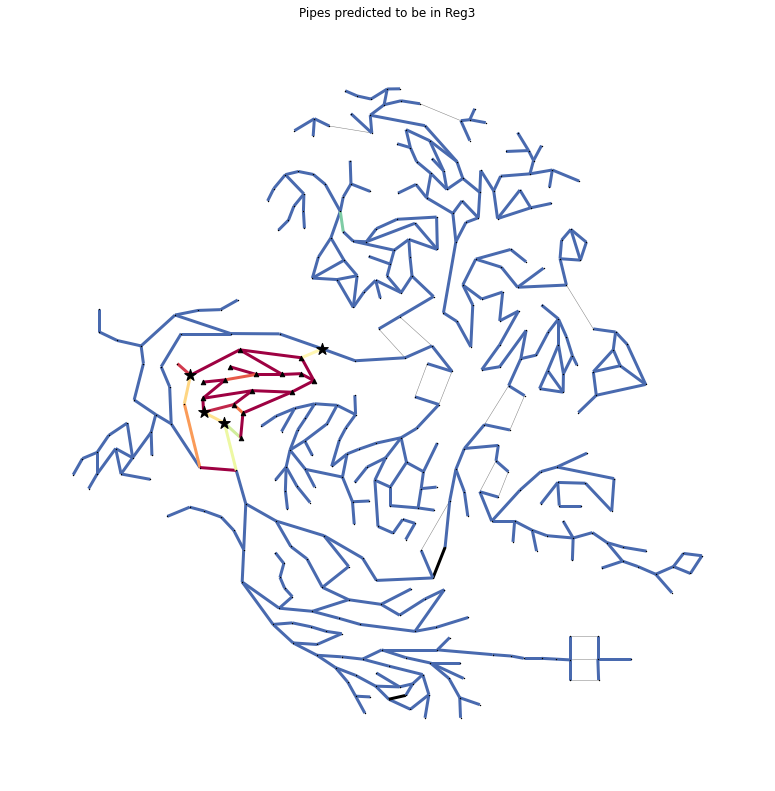

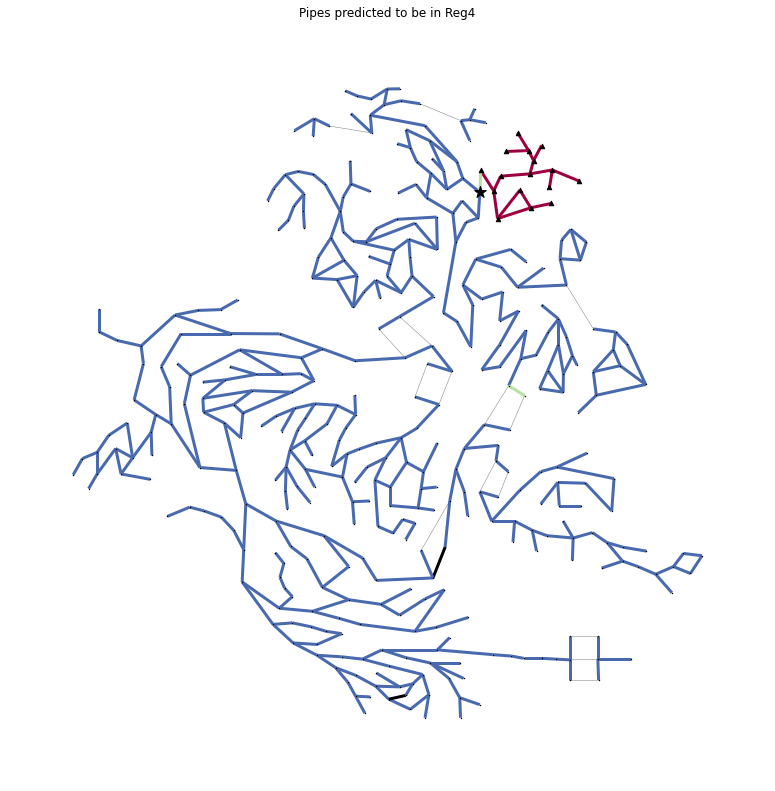

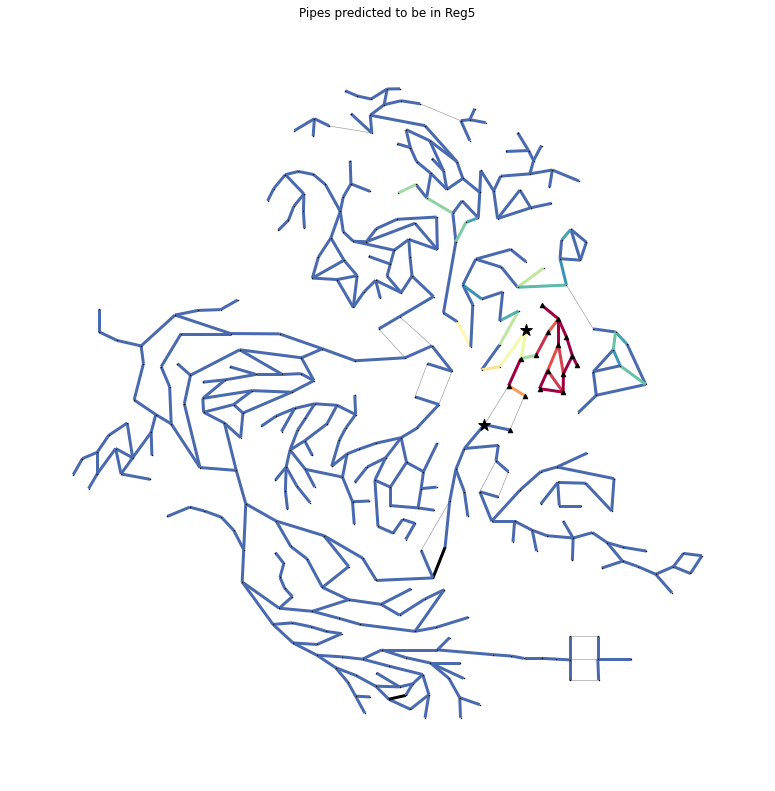

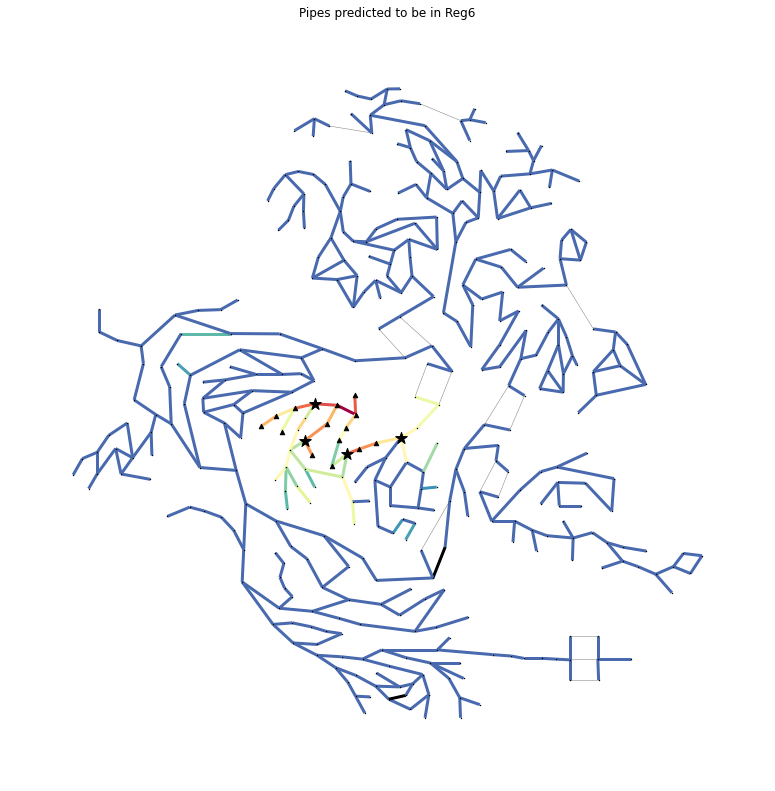

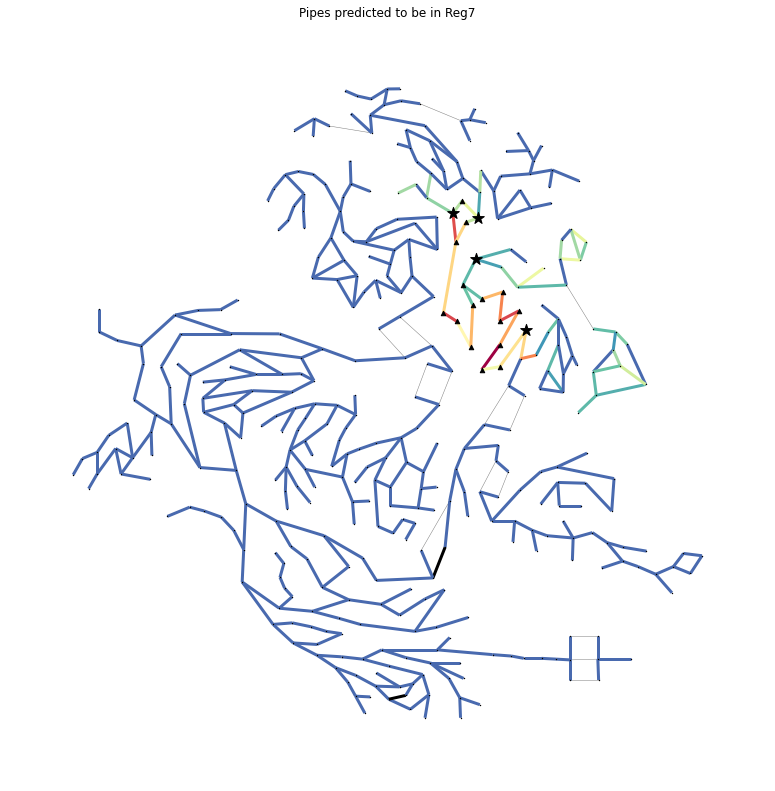

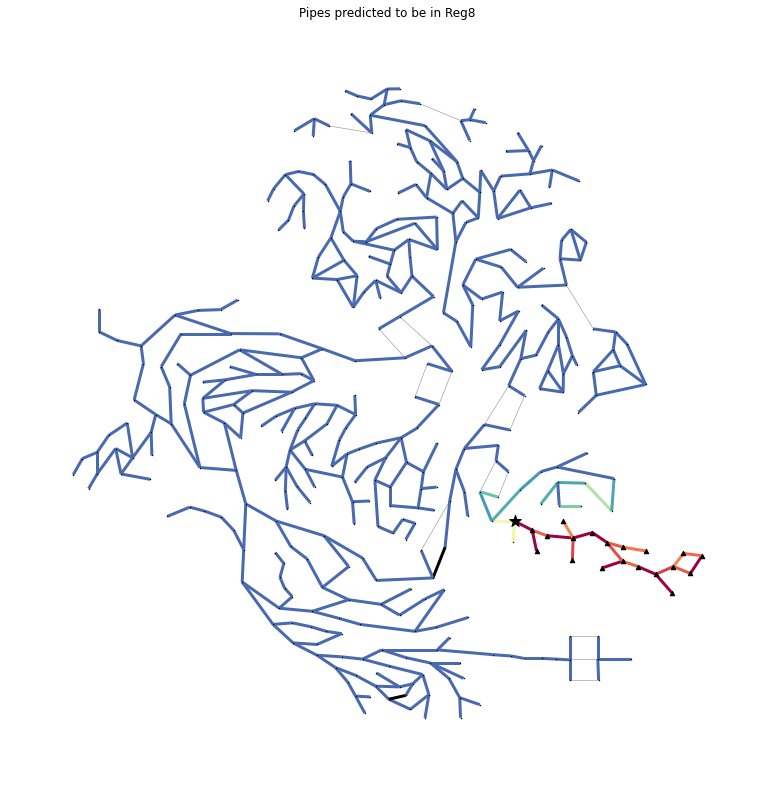

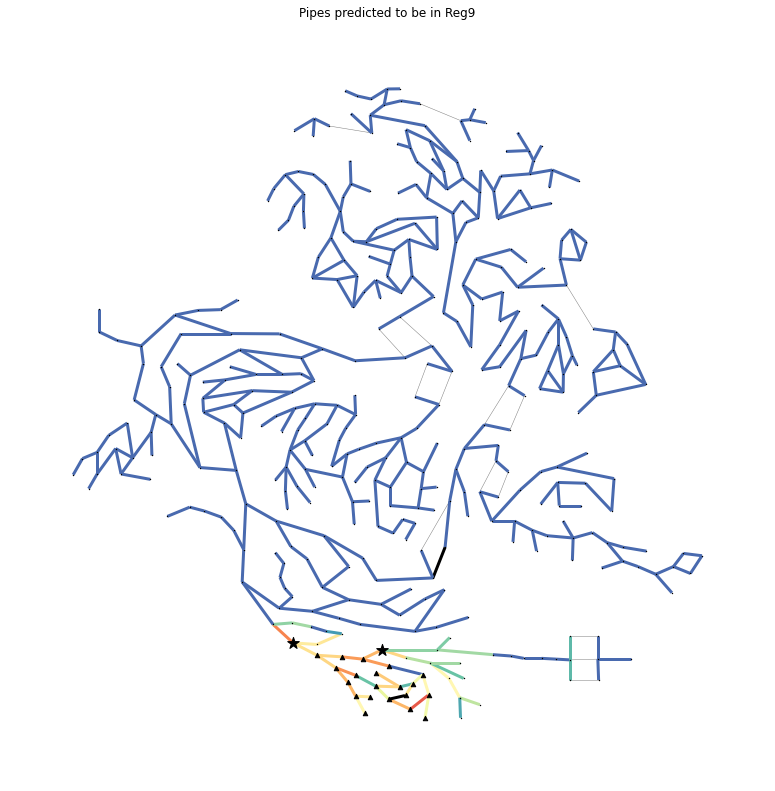

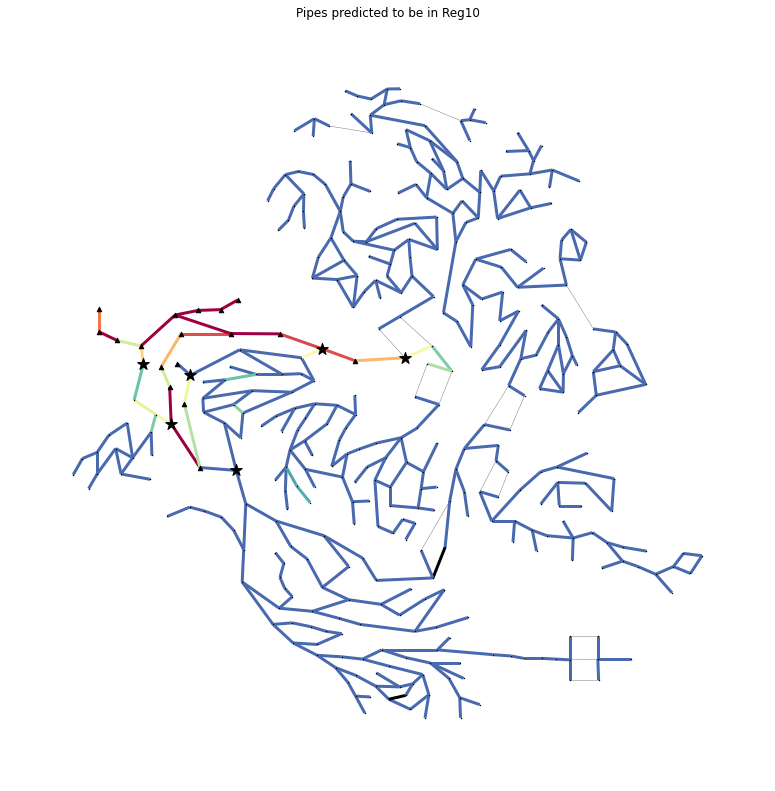

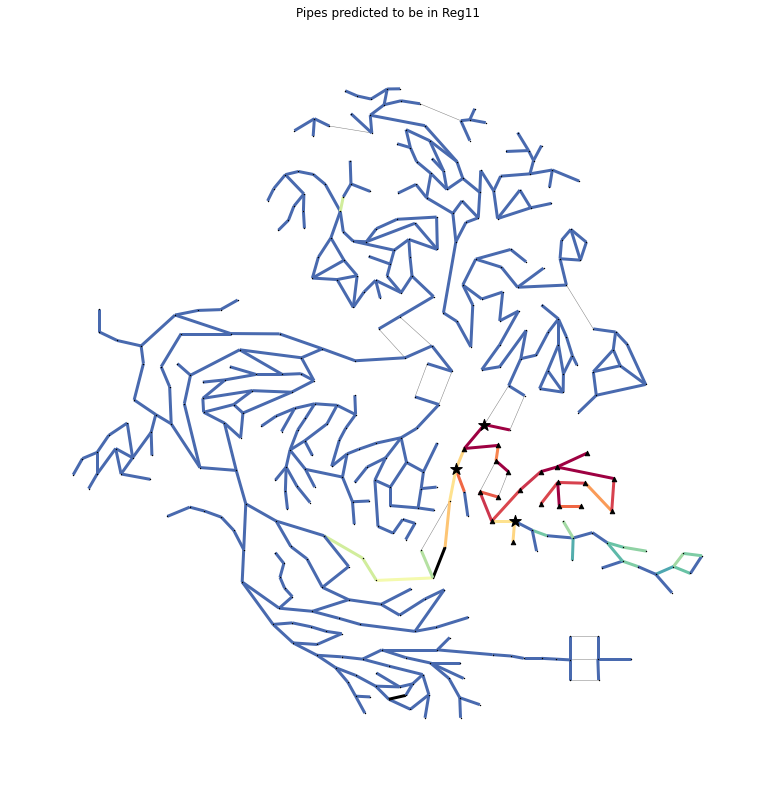

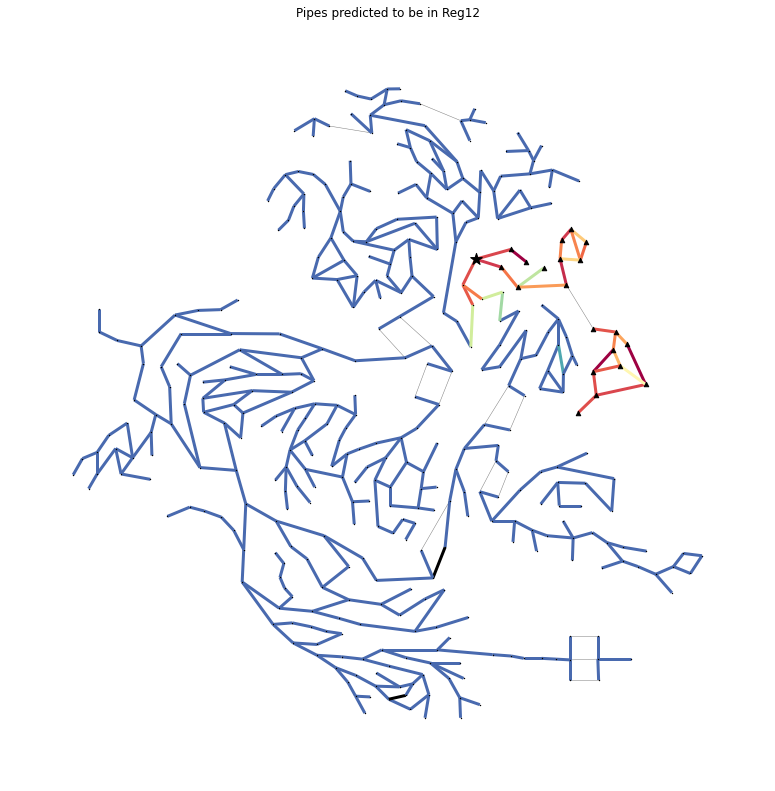

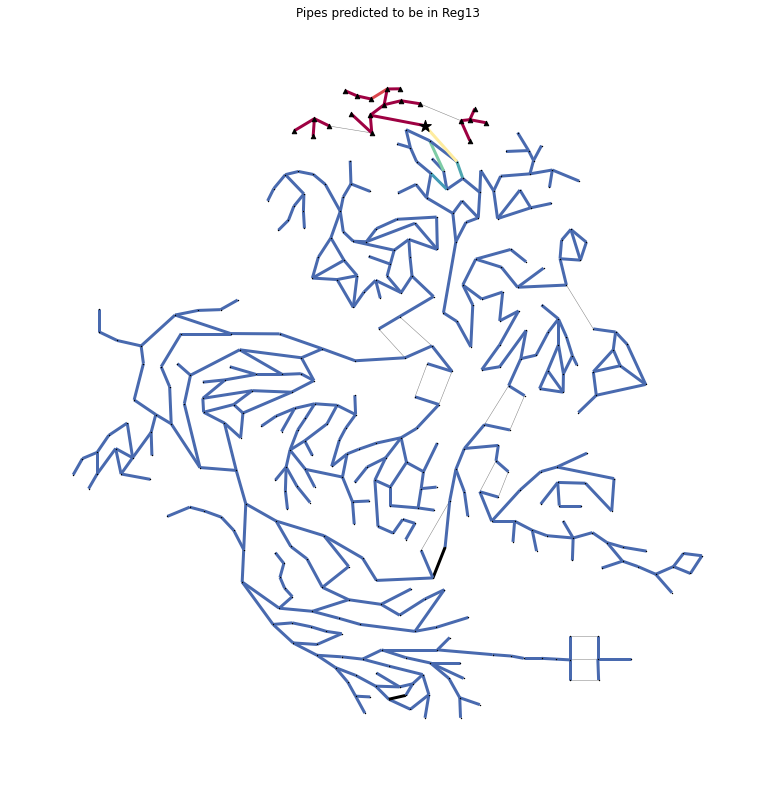

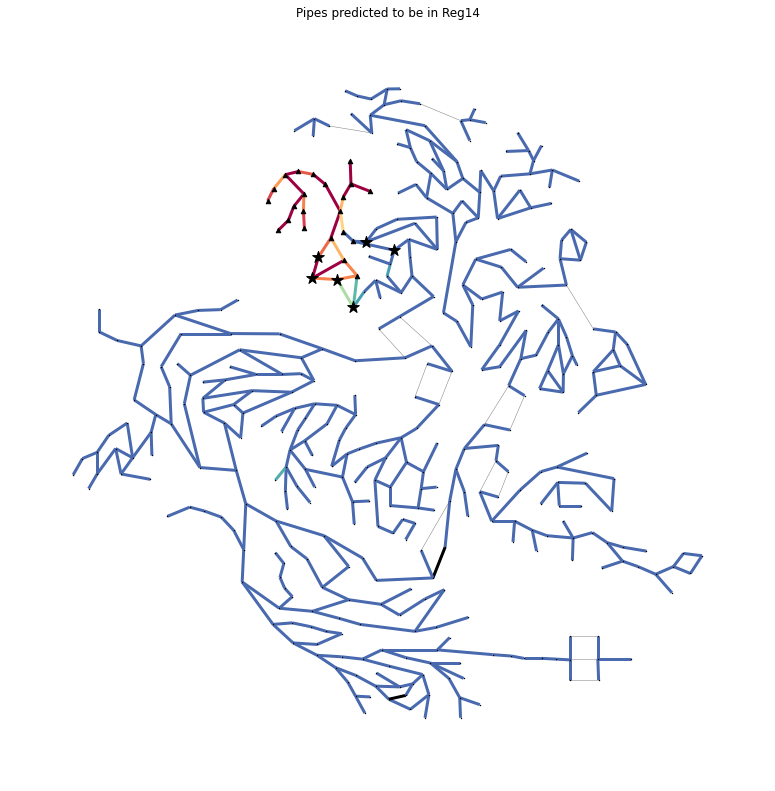

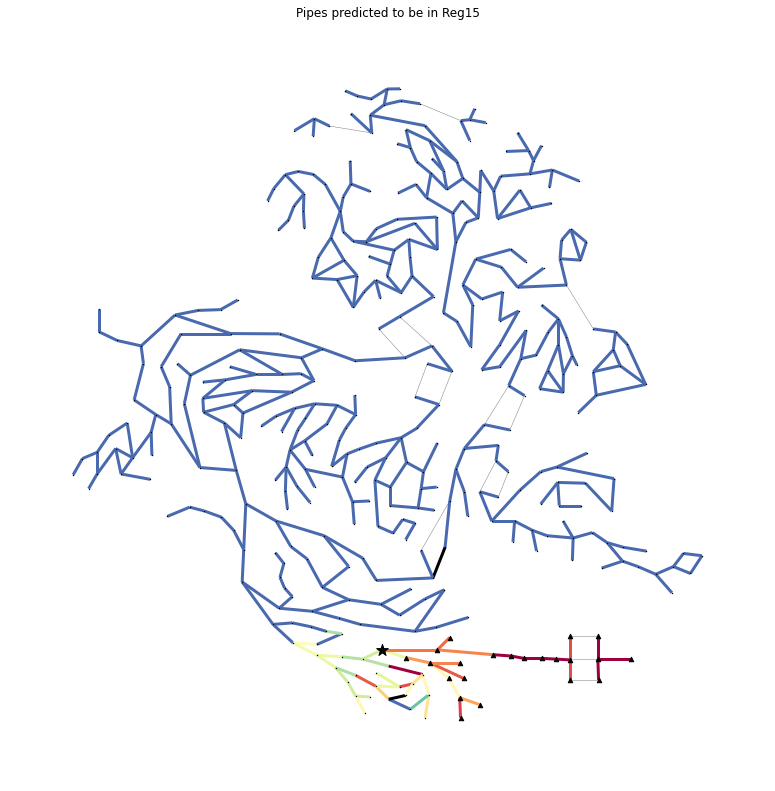

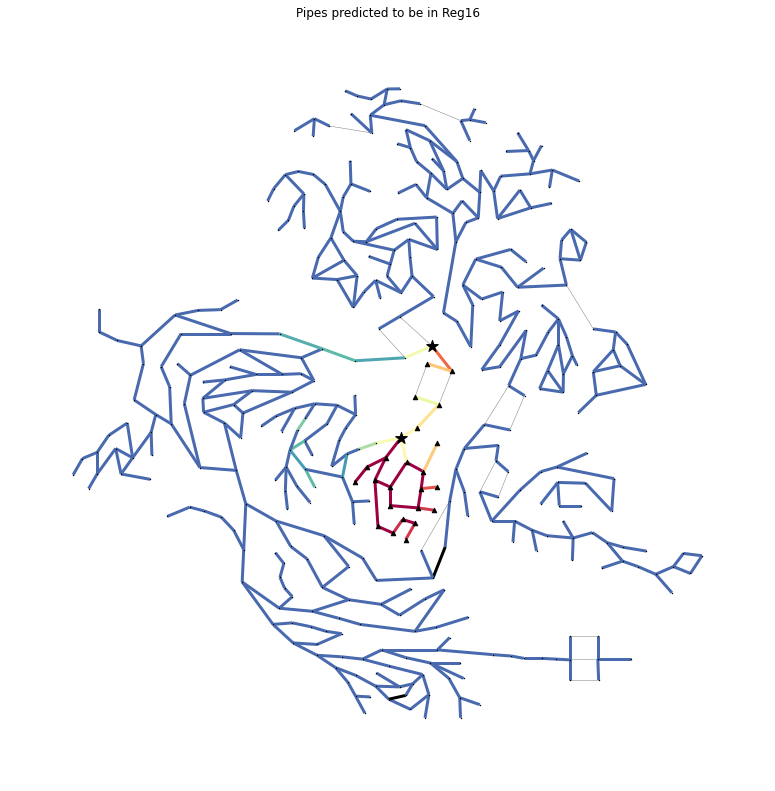

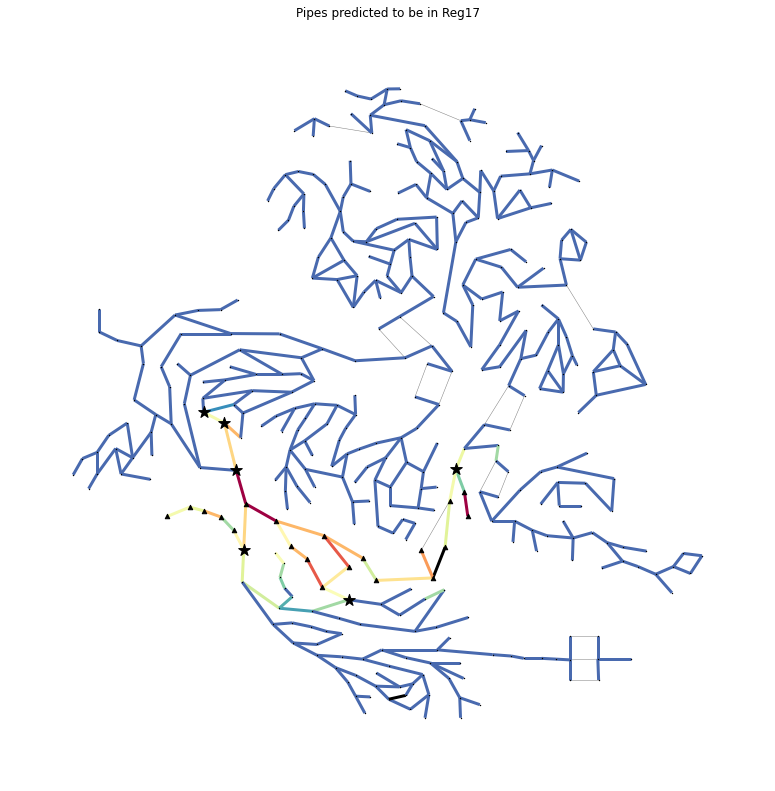

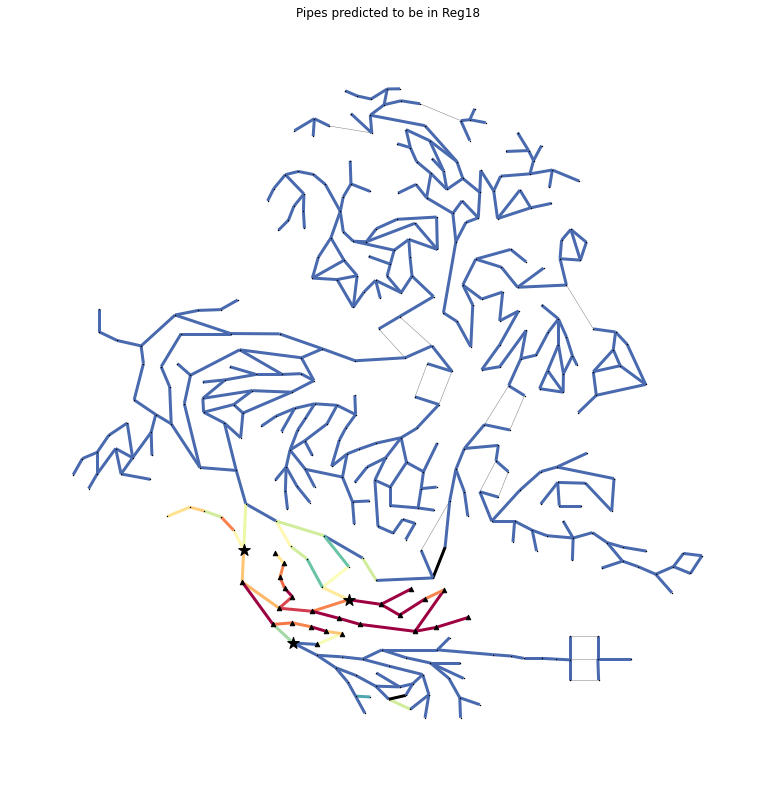

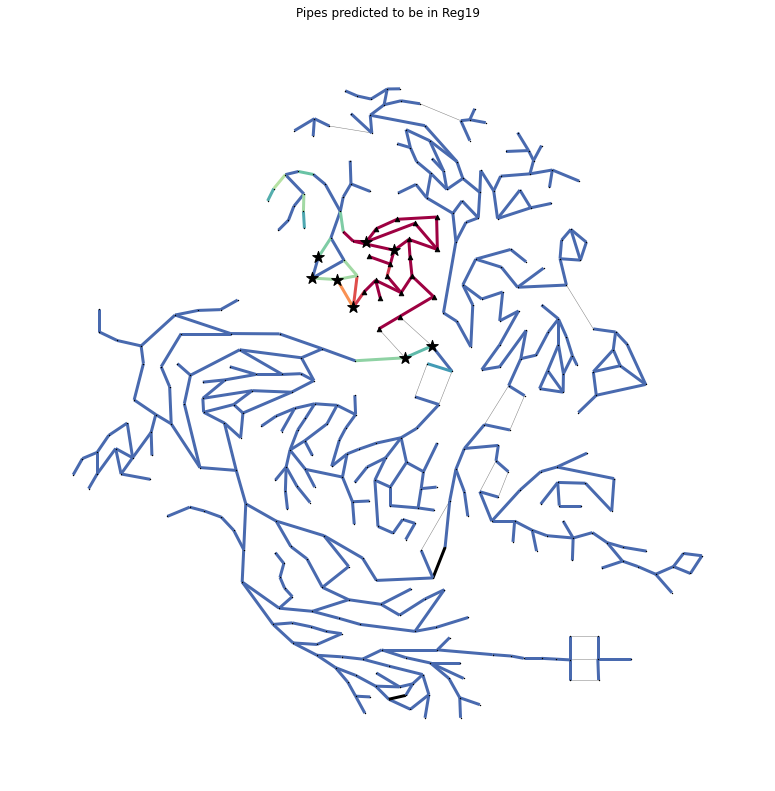

In [8]:
# Region Performance Graphics -- all regions
import wntr
import pickle

region_cnt = 20   # Use at bottom for for loop of reg_preds().
                  # Same as partitions in reg_preds().

def reg_preds(REGION=0) :
  
  partitions = region_cnt   # region_cnt is read from global space just above.

  # File paths: confusion matrix tensor and wntr input file.
  inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'
  conf_path = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Analysis/{partitions}regions/'
  conf_file = conf_path + 'conf_mat.pt'

  dir_nm = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Input Pipeline/Datasets/leak_pipes_all/{partitions}regions/00/'
  file_nm = 'dictPipeToPipeIdx.npy'
  load_loc = dir_nm + file_nm

  # Load confusion matrix tensor
  conf_mat = torch.load(conf_file)
  # Load pipDict (key: pipe str, value: tuple(region, pipIdx))
  #  The pipDict at load_loc is the one for the most recent data_to_csv created.
  #  i.e. the *assumption* here is that the conf_mat training data and pipDict match.
  #  May be best to store the pipDict and each set of training data csv files in the same folder.
  pipDict = np.load(load_loc, allow_pickle='TRUE').item()
  # print(pipDict)
  # assert False

  ## For use w/ highlighting region
  dir_path = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Input Pipeline/Datasets/leak_pipes_all/{partitions}regions/00/'
  # file_nm = f'regions_ls_11.npy'
  ### Try to automate the selection of regions_ls. ###
  ### Attempt: make datetime copy to use in general, and keep the datetime version as a master ###
  # file_nm = f'regions_ls_{partitions}_05-31-2022_1803_48.npy'   # 20 regions
  # file_nm = f'regions_ls_{partitions}_05-31-2022_2049_26.npy'   # 30 regions
  file_nm = f'regions_ls_{partitions}.npy'   # 39 regions, but conform others to "Attempt:"
  regls_file = dir_path + file_nm
  regions_ls = np.load(regls_file, allow_pickle='TRUE')   # List of list of junctions (nodes) in a region

  # Load region dict; to find boundary edges, then delineate boundary nodes.
  dir_nm = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Input Pipeline/Datasets/leak_pipes_all/{partitions}regions/00/'
  # file_nm = 'region_dict_11.pickle'
  file_nm = f'region_dict_{partitions}.pickle'
  load_loc = dir_nm + file_nm
  # For loading pickle file
  with open(load_loc, 'rb') as handle:
      reg_dict = pickle.load(handle)   # dict of dict: reg_partitions (pipes), boundary_edges
  # print(reg_dict)
  # assert False

  # Create instance of WNS
  wn_sim = WaterNetworkSimulator(inp_file)
  graph = wn_sim.wn.get_graph()
  nodes = graph.nodes.keys()
  # print(f'nodes {len(nodes)}')
  edges = graph.edges.keys()
  # print(f'edges {len(edges)}')
  # print( isinstance(edges, ordered) )

  # Labeling things?
  # https://stackoverflow.com/questions/64541963/need-to-change-shape-of-the-node-in-networkx-library-in-python
  # print('hi', graph.nodes['J14'])
  # print('hi', graph.nodes['J14']['pos'])   # Draw label at pos
  # graph.nodes['J14']['shape'] = 't'
  # print('hi', graph.nodes['J14'])
  # print(type(graph.nodes['J14']['pos']))
  # nx.draw_networkx_nodes(graph, [graph.nodes['J14']['pos']],
  #                         nodelist = ['J14'],
  #                         node_size = 10,
  #                         node_color= 'red',
  #                         node_shape = 't')
  # pos = nx.circular_layout(graph)
  # print(pos)
  # nx.draw_networkx_labels(graph, pos) # draw node labels
  # nx.draw_networkx(graph, with_labels=True)
  # assert False

  # Extract params
  # (see previous cell for reference)


  fig, ax = plt.subplots(1, 1, figsize=(14, 14))
  # fig, ax = plt.subplots(1, 1, figsize=(34, 34))
  ax.set_aspect('equal')

  # Need one graph per region
  # Each graph shows all pipes the model predicted were in the given region.
  # algo
  #  for loop thru the rows, fix the col
  #  assign link_attr
  #   scale conf_mat cell value by max elem in matrix
  #   need edge names to match the edges represented in the conf mat
  #    
  link_attribute = {}
  # node_attribute = {}   # No nodes, I think. Only edges.
  # i = 0
  # REGION = 3
  # print(conf_mat.size())
  # print(max(conf_mat[:, REGION]))
  # assert False
  # May be able to use only the pipDict. (i.e. drop the edges dict)
  #  e.g. for loop the keys (pipe_nms), index link_attr[key], assign conf_mat[pipDict[key][1]][REGION] 
  # col_max = max(conf_mat[:, REGION])
  # row_sum = sum(conf_mat[30])
  # print('row 30:', conf_mat[30])
  # print('sum:', row_sum)
  # assert False
  for edge in edges :
    # Go thru rows, find the col w/ value
    if edge[2] in pipDict :
      # print(edge[2])
      # print(pipDict[edge[2]][1])
      pipIdx = pipDict[edge[2]][1]
      # print(conf_mat[pipIdx][REGION] / col_max)
      # link_attribute[edge[2]] = (conf_mat[pipIdx][REGION] / col_max).item()
      # link_attribute[edge[2]] = (conf_mat[pipIdx][REGION] / conf_row_sum).item()
      link_attribute[edge[2]] = (conf_mat[pipIdx][REGION] / sum(conf_mat[pipIdx]) ).item()
    # print(i, edge)
    # i += 1
  # print(link_attribute)

  # plot using wntr
  #  need a way to delineate the region border.
  #  automate output of all regions. Maybe use the nodes i.e. color the border nodes
  ax = wntr.graphics.plot_network(
      wn_sim.wn, 
      ax=ax, 
      link_attribute=link_attribute,
      # node_attribute=node_attribute,
      node_size=2, 
      link_width=3,
      link_range=[-0.05, 1],
      node_range=[-0.05, 1],
      title=f'Pipes predicted to be in Reg{REGION}',
      add_colorbar=False,
      # link_labels=True,   # comment out
      # node_labels=True,
      # directed=True,   # comment out
  )

  reg = regions_ls[REGION]
  # print([nm['pos'] for nm in graph.nodes.values()])
  # print([nm['pos'] for nm in graph.nodes.values()])
  # nds = np.asarray([nm['pos'] for nm in graph.nodes.values()])
  nds = np.asarray([nod['pos'] for nm, nod in graph.nodes.items() if nm in reg])
  # nds = np.asarray([nm for nm, nod in graph.nodes.items() if nm in reg])
  # print(nds[:, 0])
  # assert False
  ax.scatter(x=nds[:, 0],
            y=nds[:, 1],
            #  x=graph.nodes['J14']['pos'][0],   # Can provide a list of x values
            #  y=graph.nodes['J14']['pos'][1],   # Can provide a list of y values
            s=20,
            c='black',
            marker='^',)

  reg_pips = reg_dict['reg_partits'][f'reg{REGION}']   # list of pipes in REGION
  # print(reg_pips)
  bond_pips = reg_dict['bndry_edges']   # dict of pipe_nms (key) and tuple (val) containing regs on either end (doesn't not say which region owns the edge)
  # print(bond_pips)
  eds = np.asarray([pip_nm for pip_nm in bond_pips if pip_nm in reg_pips])   # list of boundary edges in region
  # print('eds', eds)   # Not all regions contain boundary edges. But all contain at least one boundary node.
  bond_pip_juncs = np.asarray([(nd1, nd2) for nd1, nd2, pipe in graph.edges if pipe in bond_pips])
  if len(eds) == 0 :
    # eds empty; find boundary edge w/ junc in this region; that junc is a boundary junc
    # print('empty list!')
    # bond_pip_juncs = np.asarray([(nd1, nd2) for nd1, nd2, pipe in graph.edges if pipe in bond_pips])
    # print('bpj', bond_pip_juncs)
    bond_nds = np.asarray([nd1 if (nd1 in reg and nd1 in bond_pip_juncs) else nd2 if (nd2 in reg and nd2 in bond_pip_juncs) else None for nd1, nd2, pip in graph.edges])
    # print(bond_nds)
    # bond_nds = set(bond_nds[bond_nds != None])
    # print('clean', bond_nds)
  else :
    # print('list not empty')
    # print(graph.edges)
    ed_tups = np.asarray([tup for tup in graph.edges if tup[2] in eds])   # tuple of nodes and eds
    # print(ed_tups)
    # print(reg)
    bond_nds = np.asarray([nd2 if nd1 in reg else nd1 for nd1, nd2, pip in ed_tups])
    # print(bond_nds)
    # bond_nds = np.asarray([nd2 if (nd1 in reg and nd2 not in reg) or (nd1 not in reg and nd2 in reg) else nd1 for nd1, nd2, pip in graph.edges])
    bond_nds1 = np.asarray([nd1 if (nd1 in reg and nd1 in bond_pip_juncs and nd1 not in ed_tups) else nd2 if (nd2 in reg and nd2 in bond_pip_juncs and nd2 not in ed_tups) else None for nd1, nd2, pip in graph.edges])
    bond_nds = np.concatenate((bond_nds, bond_nds1))

  # bond_nds = np.asarray([nd2 if (nd1 in reg and nd2 not in reg) else nd1 if (nd1 not in reg and nd2 in reg) else None for nd1, nd2, pip in graph.edges])
  # print(bond_nds)
  bond_nds = set(bond_nds[bond_nds != None])   # Get rid on None elems
  # bond_nds = set(bond_cat[bond_cat != None])   # Get rid on None elems
  # print(bond_nds)
  # print(graph.nodes['J14'])   # while graph.edges is not keyed, graph.nodes is.
  # bd_pos = np.asarray([nod['pos'] for nm, nod in graph.nodes.items() if nm in bond_nds])
  bd_pos = np.asarray([graph.nodes[node]['pos'] for node in bond_nds])
  # print('bond_pos: ', bd_pos)
  # assert False
  ax.scatter(x=bd_pos[:, 0],
            y=bd_pos[:, 1],
            #  x=graph.nodes['J14']['pos'][0],   # Can provide a list of x values
            #  y=graph.nodes['J14']['pos'][1],   # Can provide a list of y values
            s=150,
            c='black',
            marker='*',)

  ax.set_aspect('equal')
  # dir_path = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Analysis/download_these/Region Preds/'
  dir_path = f'/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/Analysis/{partitions}regions/download_{partitions}regs/Region Preds/'
  file_nm = dir_path + f'pred_reg{REGION}.png'
  fig.savefig(file_nm, transparent=True)
  # fig.set_facecolor('#7d7f7c')
  # fig.savefig(file_nm, facecolor='#7d7f7c')

for i in range(region_cnt) :
  # print(f'region{i}: ')
  reg_preds(REGION=i)

In [9]:
# Interactive HTML network; filename file is generated; download and open to play w/ map
# pop = wntr.metrics.population(wn_sim)
# pop = wntr.metrics.misc.population(wn_sim.wn.get_graph())
pop = wntr.metrics.misc.population(wn_sim.wn)
# print(pop)
wntr.graphics.plot_interactive_network(wn_sim.wn, node_attribute=pop,
  node_range=[0,500], filename='population.html', auto_open=False)
  # node_range=[0,500],)

In [10]:
# Animation
#  Need to play w/ this more.
# wn_sim.wn.options.quality.parameter = 'AGE'
# sim = wntr.sim.EpanetSimulator(wn_sim.wn)
# results = sim.run_sim()
# water_age = results.node['quality']/3600 # convert seconds to hours
# anim = wntr.graphics.network_animation(wn_sim.wn, node_attribute=water_age, node_range=[0,24])
# anim.to_jshtml()

In [11]:
# Interactive leaflet; overlays WDN on map coordinates; can click on pipes and juncs to identify them.
longlat_map = {'T6':(-118.12582690150032, 34.139913113186324,), 'R1': (-118.12176067294614, 34.13680508017257,)}   # two long/lats are need; Albaquerque, NM
wn1 = wntr.morph.convert_node_coordinates_to_longlat(wn_sim.wn, longlat_map)
length = wn_sim.wn.query_link_attribute('length')
wntr.graphics.plot_leaflet_network(wn1, link_attribute=length, link_width=3, link_range=[0, 500], zoom_start=16, add_to_node_popup=None, filename='length.html')

####Scratch work

In [12]:
!pip install pipreqs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pipreqs .

INFO: Successfully saved requirements file in ./requirements.txt


In [14]:
!pwd   # print working directory

/content


In [15]:
# #from network_simulator import wntr
# import wntr

# # class Graph_Network():
# #   def __init__(self, inp_file):
# #   # Create instance of WNS
# #   self.wn_sim = wntr.network.WaterNetworkModel(inp_file)
# #   sim = wntr.sim.EpanetSimulator(self.wn_sim)
# #   self.results = sim.run_sim()

# def graph_timestamp(inp_file, net_char, hour):
#   # Create instance of WNS
#   wn_sim = wntr.network.WaterNetworkModel(inp_file)
#   sim = wntr.sim.EpanetSimulator(wn_sim)
#   results = sim.run_sim()

#   node_keys = results.node.keys()
#   #print(node_keys)
#   link_keys = results.link.keys()
#   # print(link_keys)

#   node = False
#   if net_char > 2:
#     node = True
#   # alt: [output if condition else output for l in list]

#   if net_char == 0:
#     charact_str = 'flowrate'
#   elif net_char == 1:
#     charact_str = 'headloss'
#   elif net_char == 2:
#     charact_str = 'velocity'
#   elif net_char == 3:
#     charact_str = 'demand'
#   elif net_char == 4:
#     charact_str = 'head'
#   elif net_char == 5:
#     charact_str = 'pressure'

#   if node:
#     charact = results.node[charact_str]
#   else:
#     charact = results.link[charact_str]
#     # flowrate = results.link['flowrate']
#     # flowrate_at_tmstp = flowrate.loc[3600*80,:]
#     # print(flowrate_at_timestamp)
#     # colorbar_str = 'link_colorbar_label'

#   char_at_tmstp = charact.loc[3600*hour,:]

#   fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#   # medium gray
#   # '#7d7e7c'
#   fig.set_facecolor('#7d7f7c')
#   # ax.set_facecolor('xkcd:salmon')
#   # ax.set_facecolor((1.0, 0.47, 0.42))

#   if node:
#     ax = wntr.graphics.plot_network(wn_sim,
#                                     node_attribute=char_at_tmstp,
#                                     node_range=[30,55],
#                                     node_colorbar_label=charact_str+'(m^3/hr)',
#                                     ax=ax,)
#   else:
#     ax = wntr.graphics.plot_network(wn_sim,
#                                     link_attribute=char_at_tmstp,
#                                     link_width=3,
#                                     link_range=[-0.2,0.2],
#                                     link_colorbar_label=charact_str+'(m^3/hr)',
#                                     ax=ax,)

# inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/000000/sim.inp'
# label = 'P1'   # for 000000 scenario
# net_char = 0
# hour = 80
# graph_timestamp(inp_file, net_char, hour)

In [16]:
# inp_file = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_10k_hdf_v00/_base_/sim.inp'
# # inp_file = '/content/temp_test/000001/sim.inp'
# net_char = 0
# hour = 80
# graph_timestamp(inp_file, net_char, hour)
# plt.close()

#from network_simulator import wntr
# import wntr

# # Create instance of WNS
# wn_sim = wntr.network.WaterNetworkModel(inp_file)
# sim = wntr.sim.EpanetSimulator(wn_sim)
# results = sim.run_sim()

# node_keys = results.node.keys()
# print(node_keys)

# link_keys = results.link.keys()
# print(link_keys)

# # Get the network in a NetworkX format
# #graph = wn_sim.wn.get_graph()
# #graph

# # flowrate = results.node['head']
# flowrate = results.link['flowrate']
# # print(flowrate)
# flowrate_at_tmstp = flowrate.loc[3600*80,:]
# # print(flowrate_at_timestamp)

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # ax = wntr.graphics.plot_network(wn_sim, node_attribute=head_at_tmstp,
#                                 # node_range=[30,55], node_colorbar_label='Demand ()', ax=ax)
# ax = wntr.graphics.plot_network(wn_sim, link_attribute=flowrate_at_tmstp,
#                                 node_range=[10,55], link_colorbar_label='Flow Rate (##)', ax=ax)

####Network Graph Class
- display network attributes on network graph

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning:

Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/_base_/sim.inp"; added with type None, units conversion left to user



label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000005/info.json
label(): 
 P20
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000006/info.json
label(): 
 P1000
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000007/info.json
label(): 
 P102
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000008/info.json
label(): 
 P20
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000009/info.json
label(): 
 P1024
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.08_hdf/000010/info.json
label(): 
 P1016
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFix

/usr/local/lib/python3.7/dist-packages/wntr/epanet/io.py:2082: UserWarning:

Not all curves were used in "/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/_base_/sim.inp"; added with type None, units conversion left to user



label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000005/info.json
label(): 
 P40
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000006/info.json
label(): 
 P1016
label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000007/info.json
label(): 
 P10
load_data(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000007/data.h5
load_data(): 
 /link_flowrate
graph_diff(): norm_diff_flowrate
plot_figure(): min -0.3025418817996979 max 0.2883530259132385
Displaying results: min -0.3025418817996979 max 0.2883530259132385
row 1 col 1
--- End dataset ---


label(): 
 /content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed0.07_hdf/000005/info.json
label(): 
 P40
label(): 
 /content/drive/MyDrive/Colab Noteb

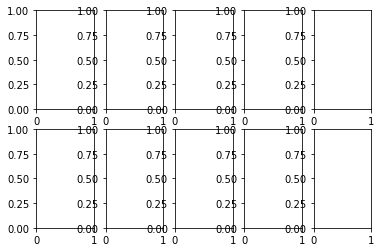

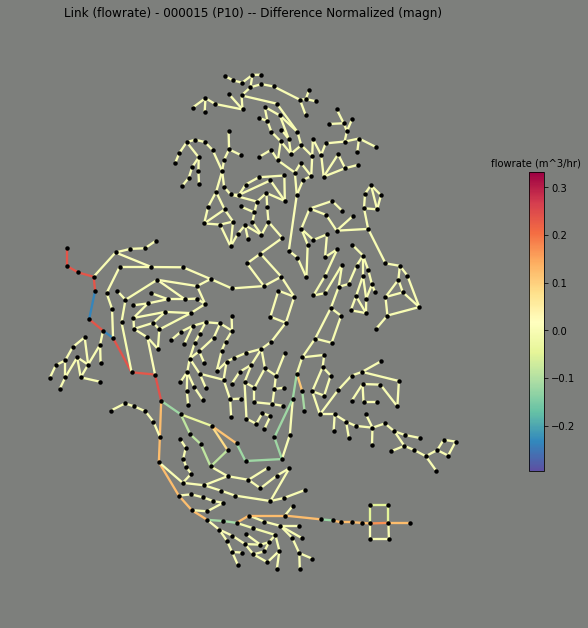

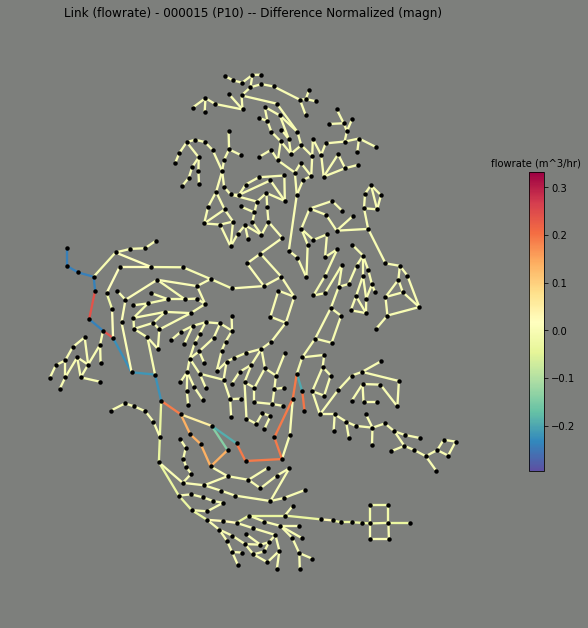

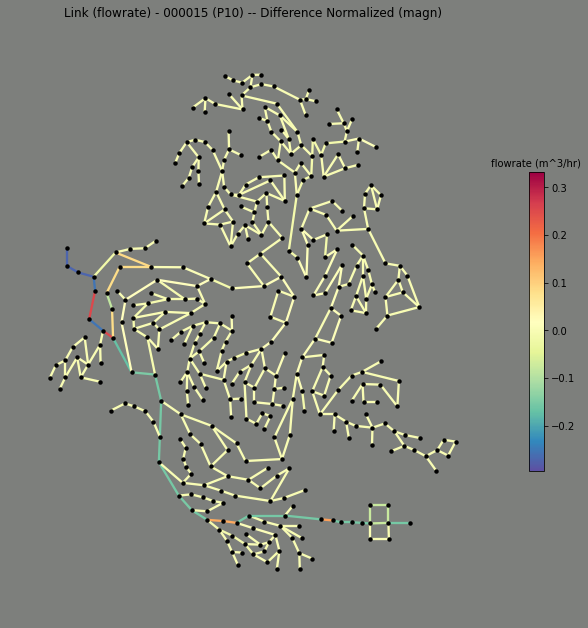

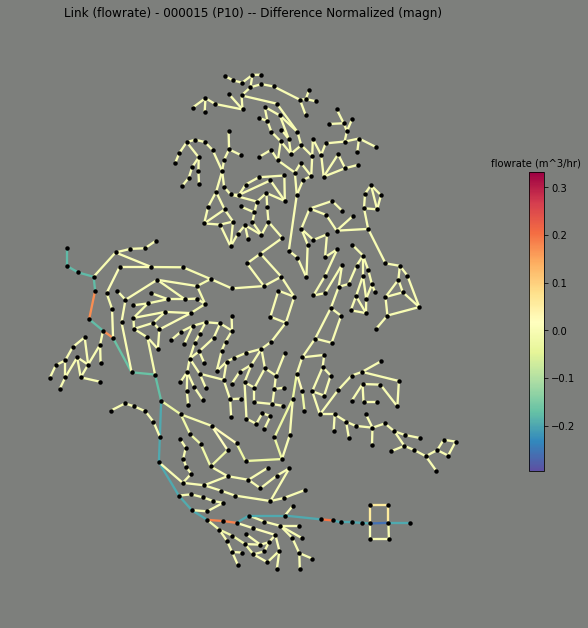

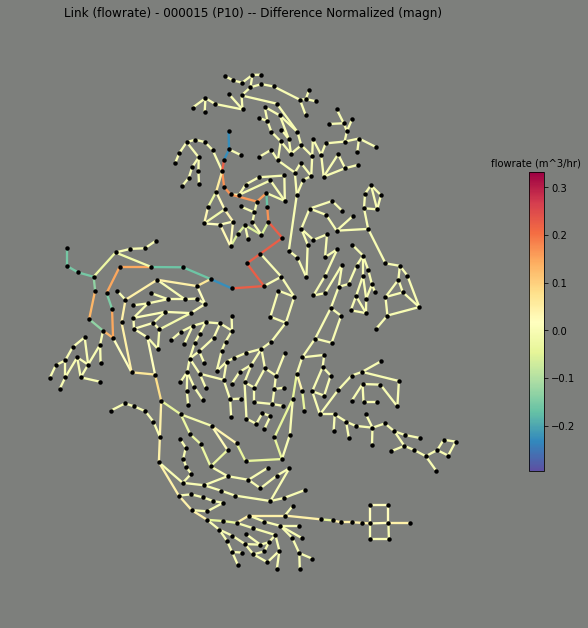

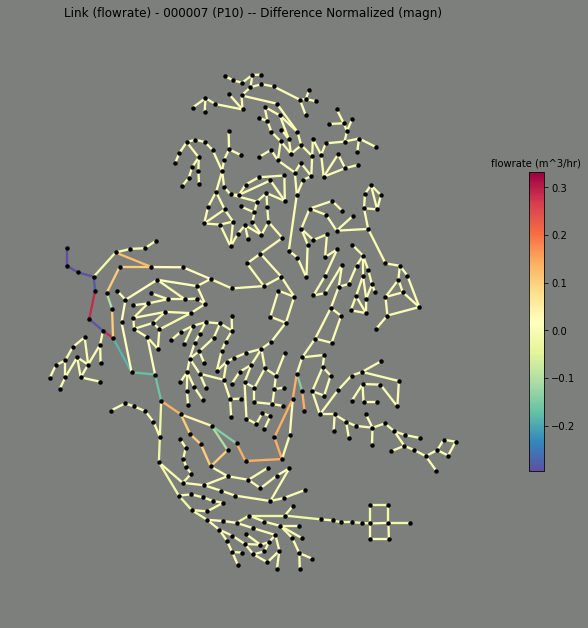

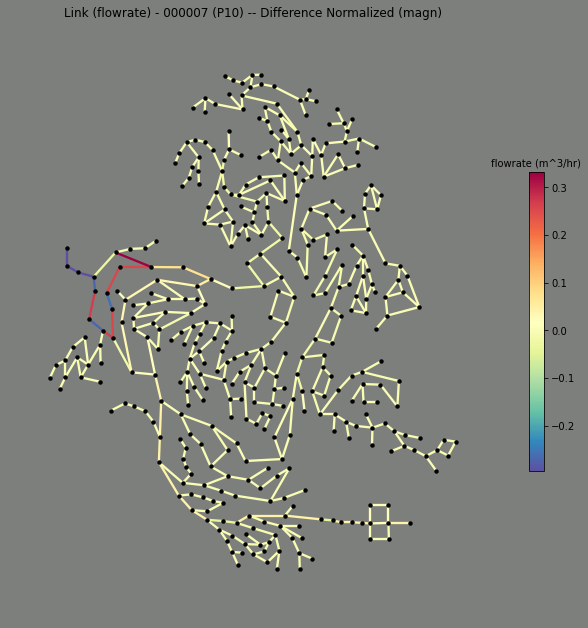

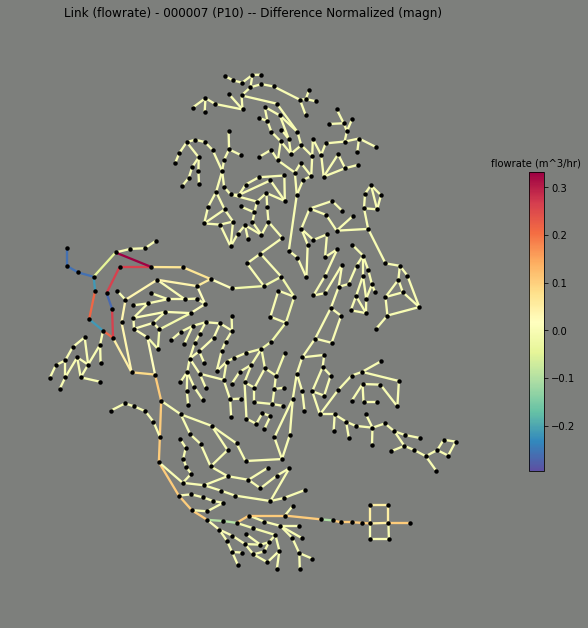

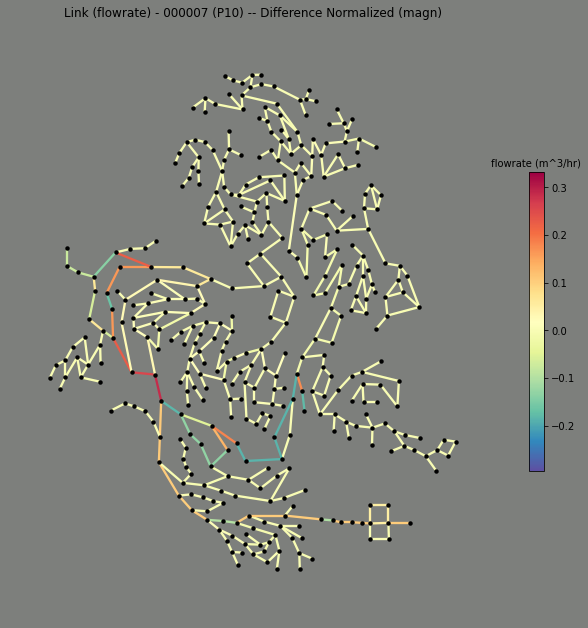

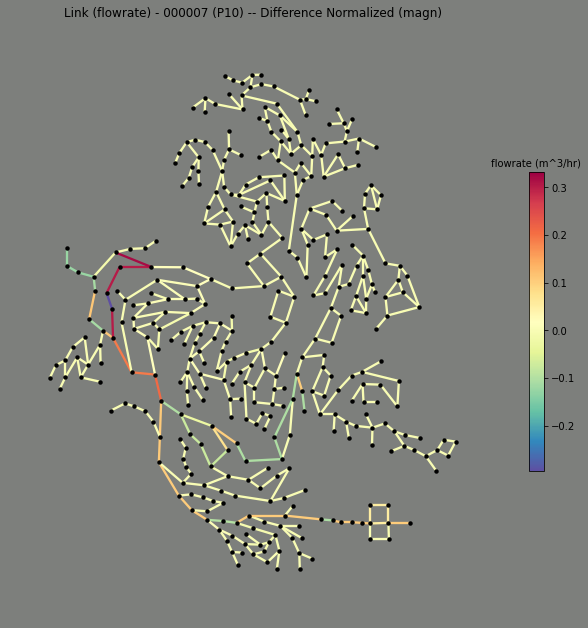

In [17]:
#from network_simulator import wntr
import wntr

class Network_Graph():
  """Center this class on leak scenario; save base case file as member"""

  def __init__(self, data_dir, scen_num, inp_file=None):
    # Load base automatically for comparison to corresponding leak scenarios
    # Create instance of WNS
    self.data_dir = data_dir
    self.scen_num = scen_num
    self.inp_file = data_dir + '_base_/sim.inp'
    self.wn_sim = wntr.network.WaterNetworkModel(self.inp_file)
    sim = wntr.sim.EpanetSimulator(self.wn_sim)   # intensionally not a member
    self.base_results = sim.run_sim()   # why run the sim? why not load the base data?
    # Range: [node_lo, node_hi, link_lo, link_hi]
    self.range = self.range_dict()   # [-1.20, 1.20, -0.0015, 0.0015]
    self.label = self.label()
    self.leak_file = self.data_dir + self.scen_num + '/data.h5'
  
  def range_dict(self) :
    return {'flowrate' : [],
            'headloss' : [],
            'velocity' : [],
            'demand' : [],
            'head' : [30, 170],
            'pressure' : [],
            'norm_flowrate' : [-0.0015, 0.0015],
            'norm_headloss' : [],
            'norm_velocity' : [],
            'norm_demand' : [],
            'norm_head' : [0.02, 0.08],
            'norm_pressure' : [],
            'max_flowrate' : [-0.0015, 0.0015],
            'max_headloss' : [],
            'max_velocity' : [],
            'max_demand' : [],
            'max_head' : [0.4, 1.00],
            'max_pressure' : [],           
            'diff_flowrate' : [-0.0015, 0.0015],
            'diff_headloss' : [],
            'diff_velocity' : [],
            'diff_demand' : [],
            'diff_head' : [-1.20, 1.20],
            'diff_pressure' : [],
            'norm_diff_flowrate' : [-0.29582, 0.33138],
            'norm_diff_headloss' : [],
            'norm_diff_velocity' : [],
            'norm_diff_demand' : [],
            # 'norm_diff_head' : [-0.01309, 0.11263],  #0.08 -> 0.1
            # 'norm_diff_head' : [-0.26436, 0.00742], # 0.01 -> 0.07
            'norm_diff_head' : [-0.26436, 0.11263],  #0.01 -> 0.1
            'norm_diff_pressure' : [],
            'max_diff_flowrate' : [-0.0015, 0.0015],
            'max_diff_headloss' : [],
            'max_diff_velocity' : [],
            'max_diff_demand' : [],
            'max_diff_head' : [-0.40, 1.20],
            'max_diff_pressure' : [],}

  def label(self):
    j_file = self.data_dir + self.scen_num + '/info.json'
    print('label(): \n', j_file)
    j_data = pd.read_json(j_file)
    label = j_data['leak_pipes'][0]
    print('label(): \n', label)
    return label

  def graph_timestamp(self, net_char, hour):
    """Graph scenario hour time stamp"""
    # data = self.load_data(net_char)
    # # print(data)
    # char_at_tmstp = data.loc[3600*hour,:]
    char_at_tmstp = self.time_stamp(net_char, hour)
    self.plot_figure(net_char, char_at_tmstp)

  def graph_base_timestamp(self, net_char, hour):
    """Display base case"""
    node, _, __ = self.node_or_link(net_char)
    append_title = ' - base'
    charac_str, units = self.char_str(net_char)

    if node:
      char_meas = self.base_results.node[charac_str]
    else:
      char_meas = self.base_results.link[charac_str]
      # flowrate = results.link['flowrate']
      # flowrate_at_tmstp = flowrate.loc[3600*80,:]
      # print(flowrate_at_timestamp)
      # colorbar_str = 'link_colorbar_label'

    char_at_tmstp = char_meas.loc[3600*hour,:]   # Panda Series
    self.plot_figure(net_char, char_at_tmstp, append_title)

  def graph_diff(self, net_char, hour) :
    """Display difference of observed and expected"""
    char_at_tmstp = self.difference(net_char, hour)
    append_title = ' -- Difference'
    range_str = 'diff_' + self.char_str(net_char)[0]
    # print('graph_diff():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
  
  def graph_norm(self, net_char, hour) :   
    char_at_tmstp = self.normalize(net_char, hour)
    append_title = ' -- Normalized (magn)'
    range_str = 'norm_' + self.char_str(net_char)[0]
    print('graph_norm():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)

  def graph_max(self, net_char, hour) :   
    char_at_tmstp = self.norm_max(net_char, hour)
    append_title = ' -- Normalized (max)'
    range_str = 'max_' + self.char_str(net_char)[0]
    print('graph_max():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)

  def graph_norm_diff(self, net_char, hour) :   
    char_at_tmstp = self.norm_diff(net_char, hour)
    append_title = ' -- Difference Normalized (magn)'
    range_str = 'norm_diff_' + self.char_str(net_char)[0]
    print('graph_diff():', range_str)
    # self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
    # return char_at_tmstp.min(), char_at_tmstp.max()
    ax = self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
    return char_at_tmstp.min(), char_at_tmstp.max(), ax
  
  def graph_max_diff(self, net_char, hour) :
    char_at_tmstp = self.max_diff(net_char, hour)
    append_title = ' -- Difference Normalized (max)'
    range_str = 'max_diff_' + self.char_str(net_char)[0]
    print('graph_diff():', range_str)
    self.plot_figure(net_char, char_at_tmstp, append_title, range_str)
  
  def time_stamp(self, net_char, hour) :
    data = self.load_data(net_char)
    # print(data)
    return data.loc[3600*hour,:]    

  def difference(self, net_char, hour):
    data = self.load_data(net_char)

    node, title, norlkeys = self.node_or_link(net_char)
    charac_str, units = self.char_str(net_char)

    # Might be more efficient to first extract the tmstp, then take the difference
    if node:
      char_meas = data.values - self.base_results.node[charac_str]
    else:
      char_meas = data.values - self.base_results.link[charac_str]

    return char_meas.loc[3600*hour,:]
    # print("diff():", type(char_at_tmstp.values))   # numpy ndarray
  
  def normalize(self, net_char, hour) :
    char_at_tmstp = self.time_stamp(net_char, hour)
    return self.div_by_magn(char_at_tmstp)

  def norm_max(self, net_char, hour) :
    char_at_tmstp = self.time_stamp(net_char, hour)
    return self.div_by_max(char_at_tmstp)

  def norm_diff(self, net_char, hour) :
    char_at_tmstp = self.difference(net_char, hour)
    return self.div_by_magn(char_at_tmstp)

  def max_diff(self, net_char, hour) :
    char_at_tmstp = self.difference(net_char, hour)
    return self.div_by_max(char_at_tmstp)

  def load_data(self, net_char) :
    net_char += 3
    leak_file = self.leak_file
    # Create dictionary of hdf file data keys
    charac_dict = self.characteristic_dict(leak_file)
    # print('load_data()', charac_dict)
    # Load leak data
    data = pd.read_hdf(leak_file, charac_dict[net_char])   # hdf using less memory; set sim file_format='hdf'
                                                           # hdf -> Hierarchical Data Format; storage and manipulation
                                                           #  of scientific data across diverse operating systems and machines
    print('load_data(): \n', leak_file)
    print('load_data(): \n', charac_dict[net_char])
    return data
  
  def node_or_link(self, net_char):
    if net_char > 2:
      node = True
      title = 'Node'
      nd_or_lk_keys = self.base_results.node.keys()
      #print(node_keys)
    else:
      node = False
      title = 'Link'
      nd_or_lk_keys = self.base_results.link.keys()
      # print(link_keys)
    # alt: [output if condition else output for l in list]
    title += ( ' (' + self.char_str(net_char)[0] + ')' +
        ' - '+self.scen_num+' ('+self.label+')' )
    return node, title, nd_or_lk_keys

  def char_str(self, net_char):
    if net_char == 0:
      charac_str = 'flowrate'
      units = '(m^3/hr)'
    elif net_char == 1:
      charac_str = 'headloss'
      units = '(m)'
    elif net_char == 2:
      charac_str = 'velocity'
      units = '(m/s)'
    elif net_char == 3:
      charac_str = 'demand'
      units = '(m^3/hr)'
    elif net_char == 4:
      charac_str = 'head'
      units = '(m)'
    elif net_char == 5:
      charac_str = 'pressure'
      units = '(m)'
    else :
      charac_str = "char_str(): Error"
      units = "char_str(): Error"
    return charac_str, units

  def characteristic_dict(self, leak_file) :
    charac_dict = {}
    with pd.HDFStore(leak_file) as hdf:
      for key, value in enumerate(hdf.keys()):
        charac_dict[key] = value
    #   print(hdf.keys())

    # output (debug=True):
    # {0: '/leak_demand', 1: '/leak_head', 2: '/leak_pressure',
    #  3: '/link_flowrate', 4: '/link_headloss', 5: '/link_velocity',
    #  6: '/node_demand', 7: '/node_head', 8: '/node_pressure'}
    # print(charac_dict)
    return charac_dict
      
  def plot_figure(self, net_char, char_at_tmstp, append_title='', range_str=None) :
    """range: [node_lo, node_hi, link_lo, link_hi]"""
    print(f'plot_figure(): min {char_at_tmstp.min()} max {char_at_tmstp.max()}' )
    charac_str, units = self.char_str(net_char)
    
    if not range_str :
      range_str = charac_str
    
    node, title, norlkeys = self.node_or_link(net_char)
    title += append_title

    fig, ax = plt.subplots(1, 1, figsize=(11, 11))
    # medium gray
    # '#7d7e7c'
    fig.set_facecolor('#7d7f7c')
    # ax.set_facecolor('xkcd:salmon')

    if node:
      ax = wntr.graphics.plot_network(self.wn_sim,
                                      node_attribute=char_at_tmstp,
                                      title=title,
                                      node_size=30,
                                      node_range=self.range[range_str],
                                      node_colorbar_label=charac_str+' '+units,
                                      ax=ax,)
    else:
      ax = wntr.graphics.plot_network(self.wn_sim,
                                      link_attribute=char_at_tmstp,
                                      title=title,
                                      link_width=2.3,
                                      link_range=self.range[range_str],
                                      link_colorbar_label=charac_str+' '+units,
                                      link_labels=False,
                                      directed=False,
                                      ax=ax,)
  
  def plot_hist(self, net_char, hour, norm='') :
    if norm == 'magn' : char_at_tmstp = self.norm_diff(net_char, hour)
    elif norm == 'max' : char_at_tmstp = self.max_diff(net_char, hour)
    else : assert False
    
    # mask_zeros = (char_at_tmstp != 0.0)
    # mask_zeros = ~((char_at_tmstp > -0.0001) & (char_at_tmstp < 0.0001))
    # print('plot_hist(): ', len(char_at_tmstp[mask_zeros]), f'of {len(char_at_tmstp)}')
    # plt.hist(char_at_tmstp[mask_zeros], bins=30)
    plt.hist(char_at_tmstp, bins=30)
    plt.show()
  
  def div_by_magn(self, tmstp_series) :
    magn = self.magn_tmstp(tmstp_series)
    # print('div_by_magn(): magn', magn)
    # print('div_by_magn(): tm / magn\n',tmstp_values / magn)
    return tmstp_series / magn

  def magn_tmstp(self, tmstp_series) :
    """tmstp_values (ndarray): """
    # Sqaure ea value
    tmstp_series = tmstp_series ** 2
    # print('tmstp_magn():', tmstp_values)
    # Sum all values
    sum_values = tmstp_series.sum()
    # print('tmstp_magn():', sum_values)
    # Return sqrt of sum
    return np.sqrt(sum_values)

  def div_by_max(self, tmstp_series) :
    # print('div_by_max():', tmstp_series.max())
    return tmstp_series / tmstp_series.max()

  def label_linkset(links):
    # label only the links listed (as opposed to all e.g. using link_labels=True)
    pass

def diffOfTwoScen() :
  pass

# data_dir = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_areaFixed_hdf/'
data_dir = '/content/drive/MyDrive/Colab Notebooks/Water Distribution Network/SimData/temp_test_1k_area'
# data_dirs = [data_dir + 'Fixed0.1_hdf/', data_dir +'Fixed0.06_hdf/', data_dir + '0.1_0.01_hdf/', data_dir +'Fixed0.02_hdf/', data_dir + 'Fixed0.01_hdf/']
# data_dirs = [data_dir +'Fixed0.06_hdf/', data_dir + 'Fixed0.07_hdf/', data_dir +'Fixed0.08_hdf/', data_dir + 'Fixed0.09_hdf/']
# Flow rate: 0.01 -> 0.1
data_dirs = [data_dir + 'Fixed0.1_hdf/', data_dir + 'Fixed0.09_hdf/', data_dir +'Fixed0.08_hdf/',
             data_dir + 'Fixed0.07_hdf/', data_dir +'Fixed0.06_hdf/', data_dir +'Fixed0.02_hdf/',
             data_dir + 'Fixed0.01_hdf/']
# Head: 0.8 -> 0.1
# data_dirs = [data_dir + 'Fixed0.1_hdf/', data_dir + 'Fixed0.09_hdf/', data_dir +'Fixed0.08_hdf/',]
# Head: 0.01 -> 0.7
# data_dirs = [data_dir + 'Fixed0.07_hdf/', data_dir +'Fixed0.06_hdf/', data_dir +'Fixed0.02_hdf/',
#              data_dir + 'Fixed0.01_hdf/']

def area_comparision() :
  # Compare area sizes for one timestamp
  mins = set()
  maxs = set()
  for data_dir in data_dirs :
    for i in range(0, 40):
      scen_num = '0000' + f'{i:02}'
      net_char = 0
      hour = 80
      #### Read graphics section of wntr docs ####
      # Possible strat: return axes, index fig positions
      leak_netgph = Network_Graph(data_dir, scen_num)
      # leak_netgph.graph_timestamp(net_char, hour)
      # leak_netgph.graph_base_timestamp(net_char, hour)
      if leak_netgph.label == 'P100' :
        # leak_netgph.difference(net_char, hour)
        # leak_netgph.graph_norm(net_char, hour)
        minim, maxim = leak_netgph.graph_norm_diff(net_char, hour)
        # leak_netgph.graph_max(net_char, hour)
        # leak_netgph.plot_hist(net_char, hour, norm='magn')
        mins.add(minim)
        maxs.add(maxim)
        print(f'Displaying results: min {minim} max {maxim}')
        break
    print('--- End dataset ---\n\n')
  print(f'Displaying results: min {mins}\n  max {maxs}')
  print(f'Displaying results: min {min(mins)} max {max(maxs)}, [{min(mins)}, {max(maxs)}]')

def time_series_fixedLeak() :
  # Time-series analysis (over multiple tmstps) of one leak area.
  mins = set()
  maxs = set()
  fig, axs = plt.subplots(2, 5)     # 10 axes, returned as a 2-by-5 2-d array
  # plt.figure(figsize=(4, 10))
  row, col, i = 0, 0, 1
  for idx in range(2, 4) :
    data_dir = data_dirs[idx]
    for tmstp in range(60, 110, 10) :
      # data_dir = data_dirs[2]   # 0.08
      # data_dir = data_dirs[3]   # 0.07
      for i in range(5, 40):
        scen_num = '0000' + f'{i:02}'
        net_char = 0
        hour = tmstp
        #### Read graphics section of wntr docs ####
        # Possible strat: return axes, index fig positions
        leak_netgph = Network_Graph(data_dir, scen_num)
        # leak_netgph.graph_timestamp(net_char, hour)
        # leak_netgph.graph_base_timestamp(net_char, hour)
        if leak_netgph.label == 'P10' :
          # leak_netgph.difference(net_char, hour)
          # leak_netgph.graph_norm(net_char, hour)
          minim, maxim, ax = leak_netgph.graph_norm_diff(net_char, hour)
          # leak_netgph.graph_max(net_char, hour)
          # leak_netgph.plot_hist(net_char, hour, norm='magn')
          mins.add(minim)
          maxs.add(maxim)
          print(f'Displaying results: min {minim} max {maxim}')
          # matplotlib -- build grid of network graphs
          # plt.sca(axs[row, col])   # set the current axes
          # axs[row, col] = plt
          # ax = fig.add_subplot(1, 2, 1)
          # axs[row, col] = plt.gca()
          axs[row, col] = ax
          # plt.subplot(250 + i)
          col += 1
          i += 1
          print(f'row {row} col {col}')
          break
      print('--- End dataset ---\n\n')
    row += 1
    col = 0
  print(f'Displaying results: min {mins}\n  max {maxs}')
  print(f'Displaying results: min {min(mins)} max {max(maxs)}, [{min(mins)}, {max(maxs)}]')
# area_comparision()
time_series_fixedLeak()
print('--- End all datasets ---\n\n')


In [18]:
  ls = [1,2,3,4,5,6]
  s = {0.9, 1, 2, 2.2}
  print(f'{min(s)}')
  # ls > 0   # relational operators not defined for Python lists

0.9


In [19]:
tn1 = torch.ones(20)
print(tn1)
tn2 = torch.ones(20) * 2
print(tn2)
tnCat = torch.cat((tn1, tn2))
print(tnCat)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.])
